In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import time, os
import pickle

import random
from sklearn.linear_model import Lasso, Ridge, RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats


In [2]:
with open('cars_list.pickle', 'rb') as handle:
    cars_df = pickle.load(handle)

In [3]:
cars_df=pd.DataFrame(cars_df)

In [4]:
cars_df

,Name,Mileage,Price,Price_Drop,Used_Certified,Exterior_Color,Interior_Color,Drivetrain,MPG,Fuel_Type,Engine,VIN,Convenience,Entertainment,Exterior,Safety,Seating,Deal_Type,Rating,Accidents
0,2020 Mercedes-Benz GLE 350 Base 4MATIC,29984.0,52573.0,247.0,Certified,Lunar Blue Metallic,Espresso Brown,All-wheel Drive,19–26,Gasoline,2.0L I4 16V GDI DOHC Turbo,4JGFB4KB6LA080943,"[Navigation System, Power Liftgate, Remote Start]","[Apple CarPlay/Android Auto, Bluetooth, HomeLi...","[Alloy Wheels, Sunroof/Moonroof]","[Backup Camera, Brake Assist, Stability Control]","[Leather Seats, Memory Seat]",Good Deal,4.9,None reported
1,2020 Acura TLX FWD,28762.0,31199.0,519.0,Used,Gray,Ebony,Front-wheel Drive,23–33,Gasoline,2.4L I4 16V GDI DOHC,19UUB1F34LA002207,"[Adaptive Cruise Control, Heated Seats]","[Apple CarPlay/Android Auto, Bluetooth, HomeLi...","[Alloy Wheels, Sunroof/Moonroof]","[Backup Camera, Brake Assist, Lane Departure W...","[Leather Seats, Memory Seat]",Fair Deal,4.6,None reported
2,2019 Mercedes-Benz GLS 450 Base 4MATIC,8270.0,60897.0,NaN,Certified,Selenite Gray Metallic,Saddle Brown,All-wheel Drive,16–22,Gasoline,3.0L V6 24V GDI DOHC Twin Turbo,4JGDF6EE2KB213705,"[Heated Seats, Power Liftgate, Remote Start]","[Bluetooth, HomeLink, Premium Sound System]","[Alloy Wheels, Sunroof/Moonroof]","[Backup Camera, Brake Assist, Stability Control]","[Leather Seats, Memory Seat, Third Row Seating]",Good Deal,5.0,None reported
3,2019 Mazda CX-9 Touring,16176.0,31495.0,193.0,Used,Jet Black Mica,Black,All-wheel Drive,20–26,Gasoline,2.5L I4 16V GDI DOHC Turbo,JM3TCBCY6K0317566,"[Adaptive Cruise Control, Heated Seats, Keyles...","[Bluetooth, HomeLink]",[Alloy Wheels],"[Backup Camera, Blind Spot Monitor, Brake Assi...","[Leather Seats, Third Row Seating]",Great Deal | $625 under,4.2,None reported
4,2016 Acura ILX 2.4L,67492.0,17995.0,1905.0,Used,Graphite Luster Metallic,Graystone,Front-wheel Drive,25–36,Gasoline,2.4L I4 16V GDI DOHC,19UDE2F7XGA007479,"[Heated Seats, Keyless Start]","[Bluetooth, HomeLink, Premium Sound System, US...","[Alloy Wheels, Sunroof/Moonroof]","[Backup Camera, Blind Spot Monitor, Brake Assi...","[Leather Seats, Memory Seat]",Good Deal,5.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,2018 INFINITI QX60 Base,32746.0,22900.0,NaN,Used,Majestic White,Graphite,All-wheel Drive,19–26,Gasoline,3.5L V6 24V MPFI DOHC,5N1DL0MM0JC522290,"[Heated Seats, Power Liftgate]","[Bluetooth, Premium Sound System]","[Alloy Wheels, Sunroof/Moonroof]","[Backup Camera, Brake Assist, Stability Control]","[Leather Seats, Third Row Seating]","Great Deal | $5,680 under",3.7,At least 1 accident or damage reported
1976,2019 GMC Acadia SLT-1,11818.0,35995.0,1000.0,Certified,Summit White,Jet Black,All-wheel Drive,17–25,Gasoline,3.6L V6 24V GDI DOHC,1GKKNULS5KZ300182,"[Power Liftgate, Remote Start]","[Bluetooth, Premium Sound System]",[Alloy Wheels],"[Brake Assist, Stability Control]","[Leather Seats, Third Row Seating]",Good Deal,4.8,None reported
1977,2020 Honda Accord Sport 1.5T,25968.0,30097.0,307.0,Used,Platinum White Pearl,Black,Front-wheel Drive,29–35,Gasoline,1.5L I4 16V GDI DOHC Turbo,1HGCV1F38LA003685,"[Adaptive Cruise Control, Keyless Start]","[Apple CarPlay/Android Auto, Bluetooth, USB Port]",[Alloy Wheels],"[Automatic Emergency Braking, Backup Camera, B...",None,Good Deal,5.0,None reported
1978,2018 Honda Accord Sport 2.0T,21367.0,23991.0,898.0,Used,Blue,–,Front-wheel Drive,22–32,Gasoline,2.0L I4 16V GDI DOHC Turbo,1HGCV2F37JA046773,"[Adaptive Cruise Control, Heated Seats, Keyles...","[Apple CarPlay/Android Auto, Bluetooth, USB Port]","[Alloy Wheels, Sunroof/Moonroof]","[Automatic Emergency Braking, Backup Camera, B...",None,Good Deal,4.0,At least 1 accident or damage reported


In [5]:
with open('zip_list.pickle', 'rb') as handle:
    zip_df = pickle.load(handle)

In [6]:
zip_df=pd.DataFrame(zip_df)

In [7]:
zip_df

,0
0,11101
1,11210
2,10019
3,11220
4,07305
...,...
1975,10701
1976,11520
1977,07083
1978,11520


In [8]:
cars_df=cars_df.merge(zip_df,left_index=True,right_index=True)

In [9]:
cars_df=cars_df.rename(columns={0:'Zip_Code'})

# Data Cleaning

In [10]:
#Dropping Duplicates

In [11]:
cars_df=cars_df.drop_duplicates(subset='VIN').reset_index()

In [12]:
#Dropping Price Drop Column as it is not very relevant to the problem and Seating and Exterior because they are
#probably reflected by the count of Entertainement and Convenience variables

In [13]:
cars_df=cars_df.drop(columns=['Price_Drop','Seating','Exterior'])

In [14]:
## Removing null values and empty values

In [15]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1793 entries, 0 to 1792
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           1793 non-null   int64  
 1   Name            1792 non-null   object 
 2   Mileage         1792 non-null   float64
 3   Price           1785 non-null   float64
 4   Used_Certified  1792 non-null   object 
 5   Exterior_Color  1792 non-null   object 
 6   Interior_Color  1792 non-null   object 
 7   Drivetrain      1792 non-null   object 
 8   MPG             1747 non-null   object 
 9   Fuel_Type       1792 non-null   object 
 10  Engine          1792 non-null   object 
 11  VIN             1792 non-null   object 
 12  Convenience     1783 non-null   object 
 13  Entertainment   1772 non-null   object 
 14  Safety          1779 non-null   object 
 15  Deal_Type       1792 non-null   object 
 16  Rating          1792 non-null   object 
 17  Accidents       1430 non-null   o

In [16]:
cars_df=cars_df.dropna(axis=0, how='any')

In [17]:
cars_df.head()

,index,Name,Mileage,Price,Used_Certified,Exterior_Color,Interior_Color,Drivetrain,MPG,Fuel_Type,Engine,VIN,Convenience,Entertainment,Safety,Deal_Type,Rating,Accidents,Zip_Code
0,0,2020 Mercedes-Benz GLE 350 Base 4MATIC,29984.0,52573.0,Certified,Lunar Blue Metallic,Espresso Brown,All-wheel Drive,19–26,Gasoline,2.0L I4 16V GDI DOHC Turbo,4JGFB4KB6LA080943,"[Navigation System, Power Liftgate, Remote Start]","[Apple CarPlay/Android Auto, Bluetooth, HomeLi...","[Backup Camera, Brake Assist, Stability Control]",Good Deal,4.9,None reported,11101
1,1,2020 Acura TLX FWD,28762.0,31199.0,Used,Gray,Ebony,Front-wheel Drive,23–33,Gasoline,2.4L I4 16V GDI DOHC,19UUB1F34LA002207,"[Adaptive Cruise Control, Heated Seats]","[Apple CarPlay/Android Auto, Bluetooth, HomeLi...","[Backup Camera, Brake Assist, Lane Departure W...",Fair Deal,4.6,None reported,11210
2,2,2019 Mercedes-Benz GLS 450 Base 4MATIC,8270.0,60897.0,Certified,Selenite Gray Metallic,Saddle Brown,All-wheel Drive,16–22,Gasoline,3.0L V6 24V GDI DOHC Twin Turbo,4JGDF6EE2KB213705,"[Heated Seats, Power Liftgate, Remote Start]","[Bluetooth, HomeLink, Premium Sound System]","[Backup Camera, Brake Assist, Stability Control]",Good Deal,5.0,None reported,10019
3,3,2019 Mazda CX-9 Touring,16176.0,31495.0,Used,Jet Black Mica,Black,All-wheel Drive,20–26,Gasoline,2.5L I4 16V GDI DOHC Turbo,JM3TCBCY6K0317566,"[Adaptive Cruise Control, Heated Seats, Keyles...","[Bluetooth, HomeLink]","[Backup Camera, Blind Spot Monitor, Brake Assi...",Great Deal | $625 under,4.2,None reported,11220
5,5,2020 Nissan Pathfinder SL,42203.0,25150.0,Used,Gray,Charcoal,Four-wheel Drive,20–27,Gasoline,3.5L V6 24V GDI DOHC,5N1DR2CM6LC606421,"[Adaptive Cruise Control, Heated Seats, Heated...","[Bluetooth, HomeLink]","[Backup Camera, Blind Spot Monitor, Brake Assi...","Great Deal | $2,579 under",4.9,None reported,07305


In [18]:
#Analyzing each variable to see if there are any values that are equivalent to null or that don't make sense

In [19]:
#Exterior_Color: 'NOT SPECIFIED and '–' have to be removed

In [20]:
cars_df.Exterior_Color.unique()

array(['Lunar Blue Metallic', 'Gray', 'Selenite Gray Metallic',
       'Jet Black Mica', 'Blue', 'Black Forest Pearl',
       'Bright Silver Metallic', 'Bluestone Metallic',
       'Modern Steel Metallic', 'Bianco Monocerus', 'Black', '–',
       'Ibis White', 'Santorini Black', 'Majestic Black Pearl',
       'Denim Blue Metallic', 'Alpine White', 'Ebony Twilight Metallic',
       'White', 'Black Onyx', 'Gunmetal Metallic', 'Grigio Lynx',
       'Jet Black', 'Black Sapphire Metallic', 'Bright White Clearcoat',
       'Diamond Black', 'Platinum White Pearl', 'Silver Metallic',
       'Nero Helene Metallic', 'Glacier Silver Metallic',
       'Phytonic Blue Metallic', 'Fuji White', 'Mojave Silver Metallic',
       'Estoril Blue Metallic', 'Rosso Mars Metallic',
       'Crystal Black Pearl', 'Crystal White Pearl Metallic',
       'Blue Ridge Mountain Metallic', 'Midnight Black',
       'Lunar Silver Metallic', 'Quartzite Metallic',
       'Alabaster Silver Metallic', 'Nightfall Mica', 'Bur

In [21]:
exterior_mask=(cars_df.Exterior_Color=='NOT SPECIFIED')|(cars_df.Exterior_Color=='–')

In [22]:
cars_df=cars_df[~exterior_mask]

In [23]:
#Interior Color
#'–' values have to be removed

In [24]:
interior_mask=(cars_df.Interior_Color=='–')

In [25]:
cars_df=cars_df[~interior_mask]

In [26]:
#Fuel_Type

In [27]:
#'–' values also have to be removed

In [28]:
cars_df.Fuel_Type.value_counts()

Gasoline                         1145
E85 Flex Fuel                      17
Hybrid                              9
Electric                            8
Gasoline/Mild Electric Hybrid       3
–                                   3
Name: Fuel_Type, dtype: int64

In [29]:
fuel_mask=(cars_df.Fuel_Type=='–')

In [30]:
cars_df=cars_df[~fuel_mask]

In [31]:
#Engine is good!

In [32]:
cars_df.Engine.unique()

array(['2.0L I4 16V GDI DOHC Turbo', '2.4L I4 16V GDI DOHC',
       '3.0L V6 24V GDI DOHC Twin Turbo', '2.5L I4 16V GDI DOHC Turbo',
       '3.5L V6 24V GDI DOHC', '3.0L I6 24V GDI DOHC Turbo',
       '2.5L I4 16V MPFI DOHC', '4.4L V8 32V GDI DOHC Twin Turbo',
       '3.5L V6 24V GDI SOHC', '4.0L V8 32V GDI DOHC Twin Turbo',
       '3.0L V6 24V GDI DOHC Supercharged', '2.0L I4 16V GDI DOHC',
       '3.6L V6 24V GDI DOHC', '4.6L V8 32V MPFI DOHC', 'I4',
       '3.0L I6 24V GDI DOHC Twin Turbo',
       '3.8L H6 24V GDI DOHC Twin Turbo', '8 Cylinder Engine',
       '3.6L V6 24V MPFI DOHC', 'V6', '5.0L V8 32V GDI DOHC',
       '1.5L I4 16V GDI DOHC Turbo',
       '2.0L I4 16V GDI DOHC Turbo Flexible Fuel',
       '3.0L V6 24V GDI DOHC Turbo', '2.4L I4 16V MPFI DOHC',
       '3.5L V6 24V MPFI DOHC', '3.8L V6 24V GDI DOHC',
       'Regular Unleaded V-8 5.7 L/345', '5.7L V8 16V MPFI OHV',
       'V6 Cylinder Engine', '2.0L I4 16V MPFI DOHC', '4 Cylinder Engine',
       'Twin Turbo Premium Unl

In [33]:
#Price is good!

In [34]:
cars_df.Price.unique()

array([ 52573.,  31199.,  60897.,  31495.,  25150.,  26500.,  15342.,
        37192.,  52900.,  40000., 319000.,  31690.,  29595.,  32500.,
        36995.,  34999.,  42000.,  57994.,  29000.,  31480.,  49500.,
        44802.,  42377.,  36900., 315995.,  35888.,  66399.,  52594.,
        43112.,  38721.,  32957.,  49231.,  35899., 152900.,  20890.,
        36500.,  39500.,  37300., 309000.,  37293.,  46988.,  57988.,
        43888.,  84394.,  39995.,  29500.,  47500.,  43502.,  56184.,
        35995.,  66420., 273435.,  38099., 237247.,  42500.,  38520.,
        33999.,  38735.,  53427., 249000.,  27598.,  37988.,  24970.,
        21970.,  66988.,  29294.,  19794.,  93888.,  41220.,  44990.,
        29995.,  36998.,  37995.,  35990.,  31990.,  62500.,  34500.,
        13990.,  22472.,  40090.,  34094.,  40651.,  35292.,  35348.,
        32901.,  39381.,  41750.,  45695.,  53743.,  30863.,  42984.,
        32199.,  27496.,  49900.,  49888.,  22995.,  14990.,  36886.,
       238900.,  589

In [35]:
#Used_Certified is good!

In [36]:
cars_df.Used_Certified.value_counts()

Used         920
Certified    262
Name: Used_Certified, dtype: int64

In [37]:
#Drivetrain is good!

In [38]:
cars_df.Drivetrain.value_counts()

All-wheel Drive      832
Front-wheel Drive    187
Four-wheel Drive     137
Rear-wheel Drive      26
Name: Drivetrain, dtype: int64

In [39]:
#Deal_Type (has to be further cleaned but looking for non sensical values: should contain Deal)

In [40]:
cars_df=cars_df[cars_df.Deal_Type.str.contains('Deal')]

In [41]:
#Accidents is good!

In [42]:
cars_df.Accidents.value_counts()

None reported                             830
At least 1 accident or damage reported    310
Name: Accidents, dtype: int64

In [43]:
#Rating is good! 

In [44]:
cars_df.Rating.value_counts()

5.0    350
4.9    162
4.6    143
4.7     72
3.7     57
4.8     56
4.3     47
4.5     43
3.5     35
4.2     32
4.4     24
4.0     22
4.1     18
1.6     17
3.2     14
3.6     13
1.9      7
2.9      4
2.8      4
3.0      3
3.8      3
3.3      3
3.4      3
3.9      3
2.7      2
2.0      1
2.6      1
1.8      1
Name: Rating, dtype: int64

In [45]:
#MPG is good! 

In [46]:
cars_df.MPG.unique()

array(['19–26', '23–33', '16–22', '20–26', '20–27', '21–31', '21–27',
       '18–25', '23–34', '20–31', '19–27', '21–25', '22–30', '15–18',
       '22–31', '14–19', '17–22', '19–28', '17–24', '14–22', '21–29',
       '23–29', '16–24', '27–33', '19–23', '18–26', '25–34', '23–31',
       '12–17', '20–28', '29–35', '17–26', '19–25', '30–38', '19–24',
       '27–32', '17–23', '22–33', '13–16', '18–23', '22–27', '22–28',
       '28–39', '24–30', '22–29', '23–32', '25–36', '17–20', '29–37',
       '25–32', '25–33', '17–27', '131–117', '18–24', '14–21', '20–29',
       '27–31', '21–26', '26–33', '15–21', '17–25', '24–32', '15–22',
       '22', '31–40', '30–40', '22–25', '44–47', '21–28', '17–21',
       '16–23', '24–34', '25–30', '21–32', '12–14', '18–27', '26–36',
       '22–32', '22–26', '24–33', '23–25', '16–19', '23–28', '27–36',
       '34–31', '18–22', '91–95', '16–25', '25–31', '13–18', '0–0',
       '20–25', '14–20', '30–39', '23–30', '21–30', '18–28', '13–17',
       '27–34', '25–35'

# Cleaning/Operations on numerical variables so they are interpretable

In [47]:
#Now that we are done with the first round of cleaning we can start working on numerical variables to do further
#cleaning 

In [48]:
#Staring with MPG, right now the format is value_a-value_b --> i want to take the average both values 

In [49]:
def MPG_Average(MPG_value):
    #for values of the form value_a-value-b
    try:
        MPG_value=MPG_value.split('–')
        MPG_average=(float(MPG_value[0])+float(MPG_value[1]))/2
    #for values of the form value_a
    except:
        MPG_average=MPG_value[0]
    return float(MPG_average)

In [50]:
cars_df['Average_MPG']=cars_df['MPG'].apply(lambda x:MPG_Average(x))

In [51]:
cars_df.head()

,index,Name,Mileage,Price,Used_Certified,Exterior_Color,Interior_Color,Drivetrain,MPG,Fuel_Type,Engine,VIN,Convenience,Entertainment,Safety,Deal_Type,Rating,Accidents,Zip_Code,Average_MPG
0,0,2020 Mercedes-Benz GLE 350 Base 4MATIC,29984.0,52573.0,Certified,Lunar Blue Metallic,Espresso Brown,All-wheel Drive,19–26,Gasoline,2.0L I4 16V GDI DOHC Turbo,4JGFB4KB6LA080943,"[Navigation System, Power Liftgate, Remote Start]","[Apple CarPlay/Android Auto, Bluetooth, HomeLi...","[Backup Camera, Brake Assist, Stability Control]",Good Deal,4.9,None reported,11101,22.5
1,1,2020 Acura TLX FWD,28762.0,31199.0,Used,Gray,Ebony,Front-wheel Drive,23–33,Gasoline,2.4L I4 16V GDI DOHC,19UUB1F34LA002207,"[Adaptive Cruise Control, Heated Seats]","[Apple CarPlay/Android Auto, Bluetooth, HomeLi...","[Backup Camera, Brake Assist, Lane Departure W...",Fair Deal,4.6,None reported,11210,28.0
2,2,2019 Mercedes-Benz GLS 450 Base 4MATIC,8270.0,60897.0,Certified,Selenite Gray Metallic,Saddle Brown,All-wheel Drive,16–22,Gasoline,3.0L V6 24V GDI DOHC Twin Turbo,4JGDF6EE2KB213705,"[Heated Seats, Power Liftgate, Remote Start]","[Bluetooth, HomeLink, Premium Sound System]","[Backup Camera, Brake Assist, Stability Control]",Good Deal,5.0,None reported,10019,19.0
3,3,2019 Mazda CX-9 Touring,16176.0,31495.0,Used,Jet Black Mica,Black,All-wheel Drive,20–26,Gasoline,2.5L I4 16V GDI DOHC Turbo,JM3TCBCY6K0317566,"[Adaptive Cruise Control, Heated Seats, Keyles...","[Bluetooth, HomeLink]","[Backup Camera, Blind Spot Monitor, Brake Assi...",Great Deal | $625 under,4.2,None reported,11220,23.0
5,5,2020 Nissan Pathfinder SL,42203.0,25150.0,Used,Gray,Charcoal,Four-wheel Drive,20–27,Gasoline,3.5L V6 24V GDI DOHC,5N1DR2CM6LC606421,"[Adaptive Cruise Control, Heated Seats, Heated...","[Bluetooth, HomeLink]","[Backup Camera, Blind Spot Monitor, Brake Assi...","Great Deal | $2,579 under",4.9,None reported,07305,23.5


In [52]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1140 entries, 0 to 1792
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           1140 non-null   int64  
 1   Name            1140 non-null   object 
 2   Mileage         1140 non-null   float64
 3   Price           1140 non-null   float64
 4   Used_Certified  1140 non-null   object 
 5   Exterior_Color  1140 non-null   object 
 6   Interior_Color  1140 non-null   object 
 7   Drivetrain      1140 non-null   object 
 8   MPG             1140 non-null   object 
 9   Fuel_Type       1140 non-null   object 
 10  Engine          1140 non-null   object 
 11  VIN             1140 non-null   object 
 12  Convenience     1140 non-null   object 
 13  Entertainment   1140 non-null   object 
 14  Safety          1140 non-null   object 
 15  Deal_Type       1140 non-null   object 
 16  Rating          1140 non-null   object 
 17  Accidents       1140 non-null   o

In [53]:
#Getting the counts of Convenience,Entertainement and Safety Features

In [54]:

def list_count(list_):
    return len(list_)

In [55]:
cars_df['Safety_Count']=cars_df.Safety.apply(lambda x:list_count(x))
cars_df['Entertainment_Count']=cars_df.Entertainment.apply(lambda x:list_count(x))
cars_df['Convenience_Count']=cars_df.Convenience.apply(lambda x:list_count(x))

In [56]:
cars_df.dtypes

index                    int64
Name                    object
Mileage                float64
Price                  float64
Used_Certified          object
Exterior_Color          object
Interior_Color          object
Drivetrain              object
MPG                     object
Fuel_Type               object
Engine                  object
VIN                     object
Convenience             object
Entertainment           object
Safety                  object
Deal_Type               object
Rating                  object
Accidents               object
Zip_Code                object
Average_MPG            float64
Safety_Count             int64
Entertainment_Count      int64
Convenience_Count        int64
dtype: object

In [57]:
#Adding a column for year as it greatly affects the price of used cars

In [58]:
cars_df['Year']=cars_df['Name'].apply(lambda x:int(x[0:5]))

In [59]:
#Seeing if values make sense,they do!

In [60]:
cars_df.Year.value_counts()

2019    591
2020    199
2018    127
2021     72
2017     39
2016     32
2015     24
2014     23
2022     10
2012      7
2013      6
2011      5
2010      2
2005      1
2009      1
2008      1
Name: Year, dtype: int64

In [61]:
cars_df

,index,Name,Mileage,Price,Used_Certified,Exterior_Color,Interior_Color,Drivetrain,MPG,Fuel_Type,...,Safety,Deal_Type,Rating,Accidents,Zip_Code,Average_MPG,Safety_Count,Entertainment_Count,Convenience_Count,Year
0,0,2020 Mercedes-Benz GLE 350 Base 4MATIC,29984.0,52573.0,Certified,Lunar Blue Metallic,Espresso Brown,All-wheel Drive,19–26,Gasoline,...,"[Backup Camera, Brake Assist, Stability Control]",Good Deal,4.9,None reported,11101,22.5,3,5,3,2020
1,1,2020 Acura TLX FWD,28762.0,31199.0,Used,Gray,Ebony,Front-wheel Drive,23–33,Gasoline,...,"[Backup Camera, Brake Assist, Lane Departure W...",Fair Deal,4.6,None reported,11210,28.0,4,4,2,2020
2,2,2019 Mercedes-Benz GLS 450 Base 4MATIC,8270.0,60897.0,Certified,Selenite Gray Metallic,Saddle Brown,All-wheel Drive,16–22,Gasoline,...,"[Backup Camera, Brake Assist, Stability Control]",Good Deal,5.0,None reported,10019,19.0,3,3,3,2019
3,3,2019 Mazda CX-9 Touring,16176.0,31495.0,Used,Jet Black Mica,Black,All-wheel Drive,20–26,Gasoline,...,"[Backup Camera, Blind Spot Monitor, Brake Assi...",Great Deal | $625 under,4.2,None reported,11220,23.0,6,2,4,2019
5,5,2020 Nissan Pathfinder SL,42203.0,25150.0,Used,Gray,Charcoal,Four-wheel Drive,20–27,Gasoline,...,"[Backup Camera, Blind Spot Monitor, Brake Assi...","Great Deal | $2,579 under",4.9,None reported,07305,23.5,5,2,7,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,1974,2019 Volvo XC60 T6 Momentum,29643.0,37387.0,Used,Ice White,Charcoal,All-wheel Drive,19–27,Gasoline,...,"[Backup Camera, Brake Assist, Stability Control]",Good Deal,4.8,None reported,11570,23.0,3,3,3,2019
1788,1975,2018 INFINITI QX60 Base,32746.0,22900.0,Used,Majestic White,Graphite,All-wheel Drive,19–26,Gasoline,...,"[Backup Camera, Brake Assist, Stability Control]","Great Deal | $5,680 under",3.7,At least 1 accident or damage reported,10701,22.5,3,2,2,2018
1789,1976,2019 GMC Acadia SLT-1,11818.0,35995.0,Certified,Summit White,Jet Black,All-wheel Drive,17–25,Gasoline,...,"[Brake Assist, Stability Control]",Good Deal,4.8,None reported,11520,21.0,2,2,2,2019
1790,1977,2020 Honda Accord Sport 1.5T,25968.0,30097.0,Used,Platinum White Pearl,Black,Front-wheel Drive,29–35,Gasoline,...,"[Automatic Emergency Braking, Backup Camera, B...",Good Deal,5.0,None reported,07083,32.0,6,3,2,2020


In [62]:
#Now let's change rating to a numerical 

In [63]:
cars_df['Rating']=cars_df['Rating'].astype(float)

In [64]:
cars_df.dtypes

index                    int64
Name                    object
Mileage                float64
Price                  float64
Used_Certified          object
Exterior_Color          object
Interior_Color          object
Drivetrain              object
MPG                     object
Fuel_Type               object
Engine                  object
VIN                     object
Convenience             object
Entertainment           object
Safety                  object
Deal_Type               object
Rating                 float64
Accidents               object
Zip_Code                object
Average_MPG            float64
Safety_Count             int64
Entertainment_Count      int64
Convenience_Count        int64
Year                     int64
dtype: object

# Cleaning/Operations on Categorical Columns so they are interpretable

In [65]:
#Let's start with Deal_Type

In [66]:
def deal_type_cleaned(deal_type):
    return deal_type.split(' |')[0]

In [67]:
cars_df['Deal_Type']=cars_df.Deal_Type.apply(lambda x:deal_type_cleaned(x))

In [68]:
cars_df.Deal_Type.unique()

array(['Good Deal', 'Fair Deal', 'Great Deal'], dtype=object)

In [69]:
#Let's extract Make from the Name Column

In [70]:
def make(car_name):
    car_name=car_name.split(' ')
    if car_name[1]=='Alfa' or car_name[1]=='Land':
        return car_name[1]+' ' +car_name[2]
    else:
        return car_name[1]
    

In [71]:
cars_df['Make']=cars_df.Name.apply(lambda x:make(x))

In [72]:
cars_df.Make.value_counts()

Honda            150
BMW              145
Mercedes-Benz    136
Toyota            72
Audi              62
Nissan            60
Acura             60
Lexus             56
Jeep              54
Chevrolet         52
Dodge             39
Volvo             30
INFINITI          25
Land Rover        22
Hyundai           21
Ford              18
Subaru            17
Mazda             17
Volkswagen        16
Kia               16
Porsche           13
Cadillac          13
GMC                9
Lincoln            7
Tesla              7
Buick              6
Alfa Romeo         4
Lamborghini        4
RAM                4
Genesis            2
Chrysler           1
MINI               1
Maserati           1
Name: Make, dtype: int64

In [73]:
#Let's extract Model from Name

In [74]:
def car_model(car_name):
    car_name=car_name.split(' ')
    if car_name[1]=='Alfa' or car_name[1]=='Land':
        return car_name[3]
    else:
        return car_name[2]

In [75]:
cars_df['Model']=cars_df['Name'].apply(lambda x:car_model(x))

In [76]:
cars_df.Model.unique()

array(['GLE', 'TLX', 'GLS', 'CX-9', 'Pathfinder', '440', 'RAV4', 'XC60',
       'M550', 'MDX', 'A4', 'X5', 'Acadia', 'M340', 'GX', 'Discovery',
       'X1', 'X3', 'Odyssey', '911', 'Durango', 'Grand', '540',
       'Defender', 'G90', 'CR-V', 'Pilot', '340', 'Macan', 'XC90', '330',
       'GLA', 'Urus', 'E-Class', 'Cayenne', 'Accord', 'M850', 'RX', 'GLB',
       'Q8', 'Civic', 'QX60', 'Passport', 'WRX', 'Tiguan', 'Range',
       '1500', 'Q50', '528', 'XT5', 'AMG', 'Q5', 'Highlander', '530',
       'X2', 'NX', 'Camry', 'Rogue', 'A6', 'Altima', 'XC40', 'ILX', 'Q7',
       '4Runner', 'Cherokee', 'RDX', 'Sentra', 'GLC', 'C-Class',
       'S-Class', 'Murano', 'Model', 'X6', 'Suburban', 'Palisade',
       'Compass', 'C-HR', 'Sorento', 'CX-5', 'Forester', 'Tahoe', 'Q3',
       'Traverse', 'CLA', 'ES', 'Crosstrek', 'X4', 'M4', 'Elantra',
       'Tucson', 'F-150', 'RS', 'MKX', 'IS', 'A-Class', 'Outback', '430',
       '740', 'Equinox', 'S60', 'G-Class', 'Corolla', 'X7', 'Sportage',
       'CLA-C

In [77]:
cars_df.dtypes

index                    int64
Name                    object
Mileage                float64
Price                  float64
Used_Certified          object
Exterior_Color          object
Interior_Color          object
Drivetrain              object
MPG                     object
Fuel_Type               object
Engine                  object
VIN                     object
Convenience             object
Entertainment           object
Safety                  object
Deal_Type               object
Rating                 float64
Accidents               object
Zip_Code                object
Average_MPG            float64
Safety_Count             int64
Entertainment_Count      int64
Convenience_Count        int64
Year                     int64
Make                    object
Model                   object
dtype: object

In [78]:
#Let's look at Engine, I want to break it down into several categories

In [79]:
#Valve Configuration
def valve_configuration(car_engine):
    car_engine=car_engine.split(' ')
    if 'DOHC' in car_engine:
        return 'DOHC'
    elif 'OHV' in car_engine:
        return 'OHV'
    elif 'SOHC'in car_engine:
        return 'SOHC'
    else:
        return 'other'

In [80]:
cars_df['Valvetrain_Type']=cars_df.Engine.apply(lambda x:valve_configuration(x))

In [81]:
cars_df.Valvetrain_Type.value_counts()

DOHC     919
other    100
SOHC      89
OHV       32
Name: Valvetrain_Type, dtype: int64

In [82]:
#Displacement

In [83]:
def engine_displacement(car_engine):
    if car_engine=='V6 Cylinder Engine'or car_engine=='V6':
        return '3.5L'
    elif car_engine=='4 Cylinder Engine'or car_engine=='I4':
        return '2.0L'
    elif car_engine=='5 Cylinder Engine':
        return '2.5L'
    elif car_engine=='Straight 6 Cylinder Engine'or car_engine=='6 Cylinder Engine':
        return '3.0L'
    elif car_engine=='8 Cylinder Engine':
        return '6L'
    elif 'Unleaded' in car_engine.split(' '):
        return car_engine.split(' ')[-2] +'L'
    elif 'Electric' in car_engine.split(' '):
        return '8.0L'
    else:
        return car_engine.split(' ')[0]

In [84]:
cars_df['Engine_Displacement']=cars_df.Engine.apply(lambda x: engine_displacement(x))

In [85]:
cars_df.Engine_Displacement.value_counts()

2.0L    358
3.5L    179
3.0L    119
1.5L     99
2.5L     95
3.6L     95
2.4L     43
1.8L     23
4.0L     20
5.7L     19
4.4L     13
1.4L     10
3.2L      8
4.6L      7
6.2L      7
3.8L      7
8.0L      7
5.3L      7
6L        5
4.7L      4
5.5L      3
2.7L      2
1.6L      2
3.7L      2
5.6L      1
5.2L      1
2.9L      1
2.3L      1
6.4L      1
5.0L      1
Name: Engine_Displacement, dtype: int64

In [86]:
def engine_to_float(car_engine):
    return float(car_engine.split('L')[0])

In [87]:
cars_df['Engine_Displacement']=cars_df.Engine_Displacement.apply(lambda x: engine_to_float(x))

In [88]:
cars_df.Engine.unique()

array(['2.0L I4 16V GDI DOHC Turbo', '2.4L I4 16V GDI DOHC',
       '3.0L V6 24V GDI DOHC Twin Turbo', '2.5L I4 16V GDI DOHC Turbo',
       '3.5L V6 24V GDI DOHC', '3.0L I6 24V GDI DOHC Turbo',
       '2.5L I4 16V MPFI DOHC', '4.4L V8 32V GDI DOHC Twin Turbo',
       '3.5L V6 24V GDI SOHC', '2.0L I4 16V GDI DOHC',
       '3.6L V6 24V GDI DOHC', '4.6L V8 32V MPFI DOHC', 'I4',
       '3.0L I6 24V GDI DOHC Twin Turbo',
       '3.8L H6 24V GDI DOHC Twin Turbo', '8 Cylinder Engine',
       '3.6L V6 24V MPFI DOHC', 'V6', '5.0L V8 32V GDI DOHC',
       '1.5L I4 16V GDI DOHC Turbo',
       '2.0L I4 16V GDI DOHC Turbo Flexible Fuel',
       '4.0L V8 32V GDI DOHC Twin Turbo', '3.0L V6 24V GDI DOHC Turbo',
       '2.4L I4 16V MPFI DOHC', '3.5L V6 24V MPFI DOHC',
       'Regular Unleaded V-8 5.7 L/345', '5.7L V8 16V MPFI OHV',
       'V6 Cylinder Engine', '2.0L I4 16V MPFI DOHC', '4 Cylinder Engine',
       '3.0L V6 24V GDI DOHC Supercharged',
       'Twin Turbo Premium Unleaded V-6 3.0 L/183',
  

In [89]:
def car_cylinders(car_cylinder):
    if len(car_cylinder.split(' '))<2:
        return car_cylinder.split(' ')[0]
    elif 'Electric' in car_cylinder.split(' '):
        return 'Electric'
    elif car_cylinder.split(' ')[1]=='Cylinder':
        return car_cylinder.split(" ")[0]
    elif 'Unleaded' in car_cylinder.split(' '):
        return car_cylinder.split(' ')[-3].replace('-','')
    elif car_cylinder=='2.0L':
        return 'Other'
    else:
        return car_cylinder.split(' ')[1]

In [90]:
cars_df['Cylinders']=cars_df.Engine.apply(lambda x: car_cylinders(x))

In [91]:
cars_df.Cylinders.value_counts()

I4          584
V6          341
V8           81
I6           63
4            27
H4           17
Electric      7
H6            6
8             5
6             5
2.0L          2
V10           1
5             1
Name: Cylinders, dtype: int64

In [92]:
cars_df.dtypes

index                    int64
Name                    object
Mileage                float64
Price                  float64
Used_Certified          object
Exterior_Color          object
Interior_Color          object
Drivetrain              object
MPG                     object
Fuel_Type               object
Engine                  object
VIN                     object
Convenience             object
Entertainment           object
Safety                  object
Deal_Type               object
Rating                 float64
Accidents               object
Zip_Code                object
Average_MPG            float64
Safety_Count             int64
Entertainment_Count      int64
Convenience_Count        int64
Year                     int64
Make                    object
Model                   object
Valvetrain_Type         object
Engine_Displacement    float64
Cylinders               object
dtype: object

In [93]:
cars_df=cars_df.drop(columns='index')

In [94]:
cars_df.dtypes

Name                    object
Mileage                float64
Price                  float64
Used_Certified          object
Exterior_Color          object
Interior_Color          object
Drivetrain              object
MPG                     object
Fuel_Type               object
Engine                  object
VIN                     object
Convenience             object
Entertainment           object
Safety                  object
Deal_Type               object
Rating                 float64
Accidents               object
Zip_Code                object
Average_MPG            float64
Safety_Count             int64
Entertainment_Count      int64
Convenience_Count        int64
Year                     int64
Make                    object
Model                   object
Valvetrain_Type         object
Engine_Displacement    float64
Cylinders               object
dtype: object

In [95]:
cars_df_deck=cars_df.drop(columns=['Name','Engine','VIN'])

In [96]:
len(cars_df_deck.columns)

25

In [97]:
cars_df_deck.columns

Index(['Mileage', 'Price', 'Used_Certified', 'Exterior_Color',
       'Interior_Color', 'Drivetrain', 'MPG', 'Fuel_Type', 'Convenience',
       'Entertainment', 'Safety', 'Deal_Type', 'Rating', 'Accidents',
       'Zip_Code', 'Average_MPG', 'Safety_Count', 'Entertainment_Count',
       'Convenience_Count', 'Year', 'Make', 'Model', 'Valvetrain_Type',
       'Engine_Displacement', 'Cylinders'],
      dtype='object')

In [98]:
cars_df_deck[['Year','Make','Model','Price','Mileage','Rating','Drivetrain', 'Average_MPG', 'Fuel_Type', 'Convenience_Count',
       'Entertainment_Count', 'Safety_Count', 'Deal_Type','Engine_Displacement','Valvetrain_Type','Cylinders','Zip_Code',\
             'Interior_Color','Exterior_Color','Accidents','Used_Certified']].loc[1]

Year                                2020
Make                               Acura
Model                                TLX
Price                            31199.0
Mileage                          28762.0
Rating                               4.6
Drivetrain             Front-wheel Drive
Average_MPG                         28.0
Fuel_Type                       Gasoline
Convenience_Count                      2
Entertainment_Count                    4
Safety_Count                           4
Deal_Type                      Fair Deal
Engine_Displacement                  2.4
Valvetrain_Type                     DOHC
Cylinders                             I4
Zip_Code                           11210
Interior_Color                     Ebony
Exterior_Color                      Gray
Accidents                  None reported
Used_Certified                      Used
Name: 1, dtype: object

# Baseline Model

In [99]:
#Starting with the numerical variables

In [100]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num= cars_df.select_dtypes(include=numerics)

<AxesSubplot:>

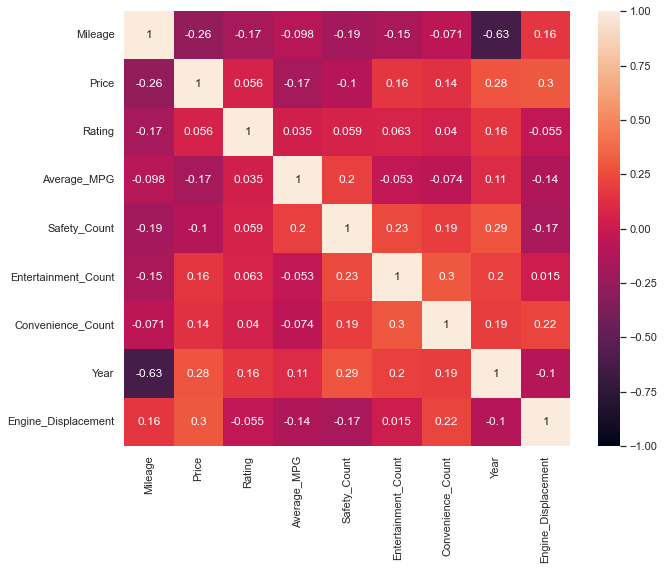

In [101]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.heatmap(df_num.corr(),vmin=-1,vmax=1,annot=True)

In [102]:
#At a glance looks like Year and Mileage have high colinearity let's check VIF Scores:

In [103]:
def cross_val_and_regression_results(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                           test_size=.2,     
                                          random_state=42)
    kf = KFold(n_splits=5, 
            shuffle=True, 
            random_state = 42)
    lm = LinearRegression()

    scores = cross_val_score(lm, X_train, y_train, cv=kf)
   # return(("Cross Val Scores:",list(scores))
    lm.fit(X_train,y_train)
           #("Linear Reg Mean Score:", np.mean(scores)))
    #y_pred=lm.predict(X_train)
    mae = sum(abs(lm.predict(X_test) - y_test))/len(y_test)
    return{"Cross Val Score":scores,"Linear Reg Mean Val Score ": np.mean(scores),\
           "Linear Reg Train Score":lm.score(X_train,y_train),"Linear Reg Test Score":lm.score(X_test,y_test),\
          'Mean Squared Error Test':mae }

In [104]:
X1=df_num.drop(columns=['Price'])
y1=df_num['Price']

In [105]:
X1.columns

Index(['Mileage', 'Rating', 'Average_MPG', 'Safety_Count',
       'Entertainment_Count', 'Convenience_Count', 'Year',
       'Engine_Displacement'],
      dtype='object')

In [106]:
cross_val_and_regression_results(X1,y1)

{'Cross Val Score': array([0.23967541, 0.20508709, 0.29163301, 0.23337626, 0.26669508]),
 'Linear Reg Mean Val Score ': 0.24729337310925362,
 'Linear Reg Train Score': 0.270840904284116,
 'Linear Reg Test Score': 0.22653030275233565,
 'Mean Squared Error Test': 11210.475415344183}

In [107]:
# VIF dataframe
X1=sm.add_constant(X1)
vif_data = pd.DataFrame()
vif_data["Feature"] = X1.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X1.values, i)
                          for i in range(len(X1.columns))]
vif_data['VIF']=vif_data.VIF.round(3)

/Users/riwasabri/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [108]:
vif_data

,Feature,VIF
0,const,2389460.965
1,Mileage,1.690
2,Rating,1.038
3,Average_MPG,1.076
4,Safety_Count,1.226
5,Entertainment_Count,1.168
6,Convenience_Count,1.231
7,Year,1.790
8,Engine_Displacement,1.137


In [109]:
#The vif results are okay, let's leave things as is for now.

In [110]:
#Let's run or first model on the whole data

In [111]:
model = sm.OLS(y1,X1)
fit = model.fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     51.17
Date:                Tue, 09 Aug 2022   Prob (F-statistic):           7.89e-71
Time:                        13:53:48   Log-Likelihood:                -13009.
No. Observations:                1140   AIC:                         2.604e+04
Df Residuals:                    1131   BIC:                         2.608e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -6.597e+06    

In [112]:
#Rating has a really high P-value, let's drop it

In [113]:
cars_df=cars_df.drop(columns=['Rating','Convenience_Count'])
df_num=df_num.drop(columns=['Rating','Convenience_Count'])

In [114]:
#Now let's plot our variables with the target to check relationships 

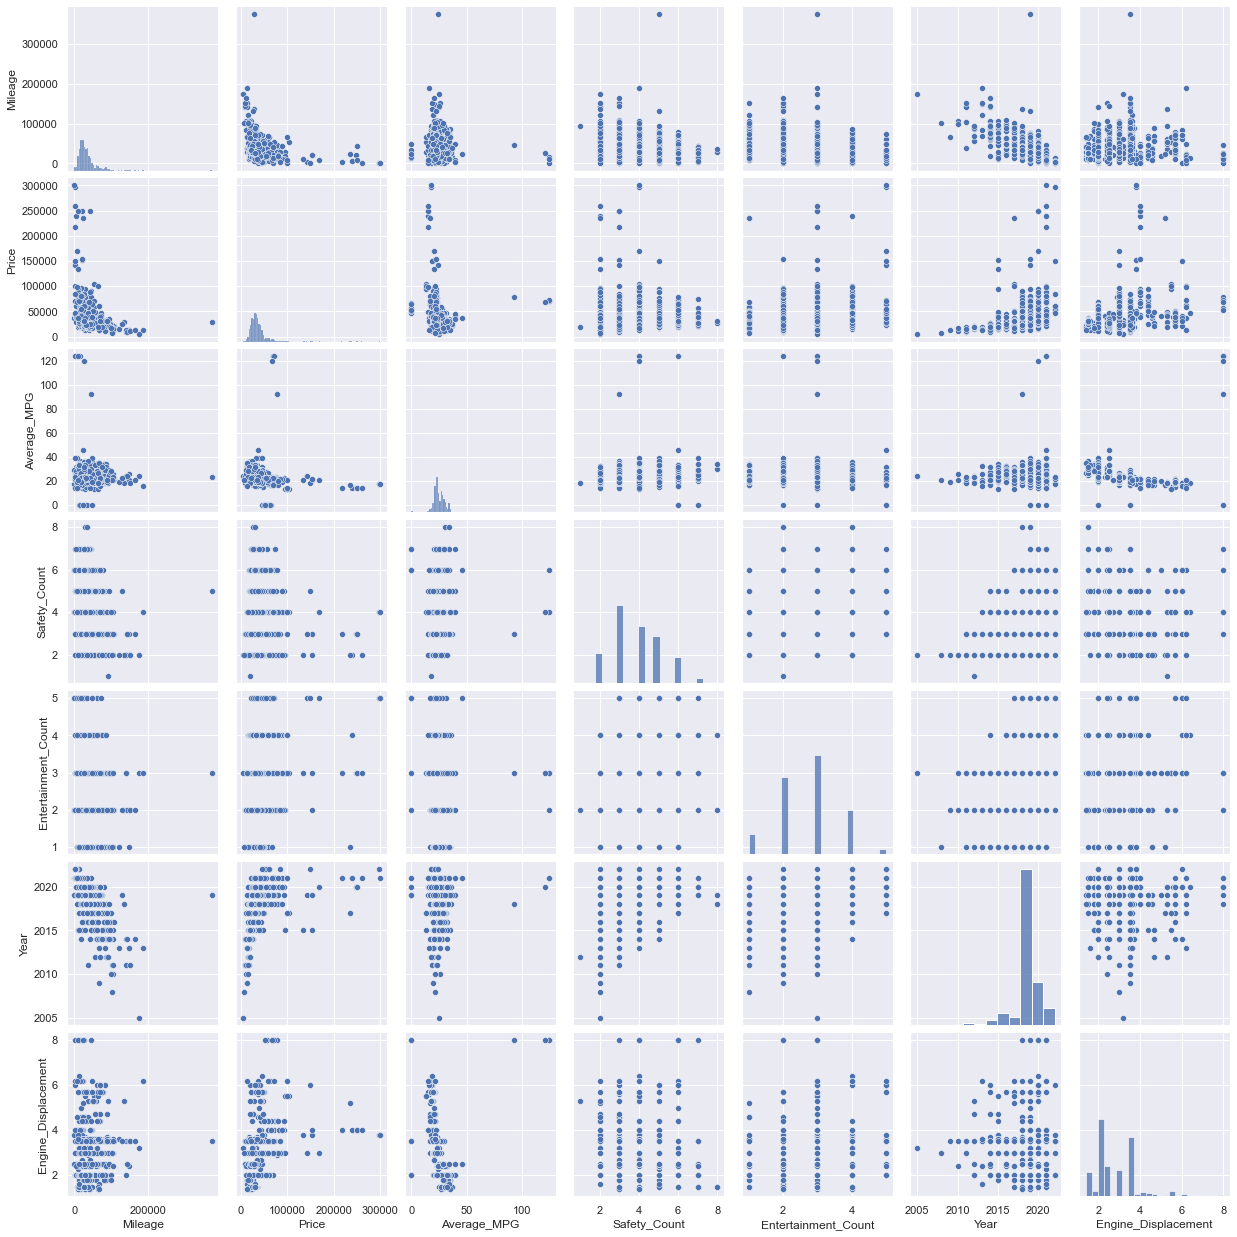

In [115]:
sns.pairplot(df_num)

A few observations:
Year and Price seem to have a polynomial relationship while
Convenience, Entertainement and Safety Count don't seem to have much of a direct relationship with price

In [116]:
df_num['Year_Squared']=df_num['Year']*df_num['Year']
cars_df['Year_Squared']=cars_df['Year']*cars_df['Year']

In [117]:
#Back to the heatmap to determine which one has the strongest relationship with Price

<AxesSubplot:>

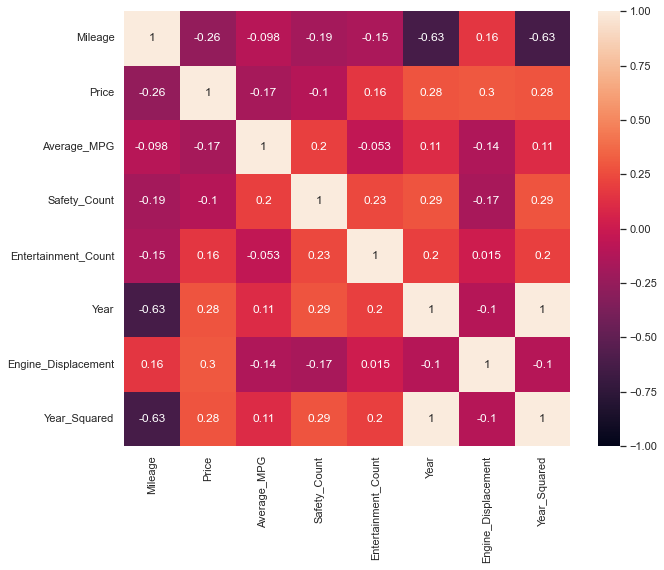

In [118]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.heatmap(df_num.corr(),vmin=-1,vmax=1,annot=True)

In [119]:
#Looks like Entertainment count has the highest relationship with price, let's remove the two other 

In [120]:
#cars_df=cars_df.drop(columns=['Safety_Count','Convenience_Count'])
#df_num=df_num.drop(columns=['Safety_Count','Convenience_Count'])

In [121]:
#Now let's plot 

In [122]:
X1=df_num.drop(columns=['Price'])
y1=df_num['Price']

In [123]:
X1

,Mileage,Average_MPG,Safety_Count,Entertainment_Count,Year,Engine_Displacement,Year_Squared
0,29984.0,22.5,3,5,2020,2.0,4080400
1,28762.0,28.0,4,4,2020,2.4,4080400
2,8270.0,19.0,3,3,2019,3.0,4076361
3,16176.0,23.0,6,2,2019,2.5,4076361
5,42203.0,23.5,5,2,2020,3.5,4080400
...,...,...,...,...,...,...,...
1787,29643.0,23.0,3,3,2019,2.0,4076361
1788,32746.0,22.5,3,2,2018,3.5,4072324
1789,11818.0,21.0,2,2,2019,3.6,4076361
1790,25968.0,32.0,6,3,2020,1.5,4080400


In [124]:
cross_val_and_regression_results(X1,y1)

{'Cross Val Score': array([0.24131138, 0.20692415, 0.30837031, 0.24716443, 0.27482307]),
 'Linear Reg Mean Val Score ': 0.255718667073782,
 'Linear Reg Train Score': 0.28172108652045236,
 'Linear Reg Test Score': 0.2563219394477354,
 'Mean Squared Error Test': 11102.472095450812}

In [125]:
#Okay, we can do better, scores are jumping around --> test score>train score means outliers

In [126]:
def diagnostic_plots(y_pred, y_true, resid):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    g1 = sns.regplot(x=y_pred, y=y_true, ci=False, fit_reg=False, line_kws={'color': 'blue'}, ax=axes[0], scatter_kws={'s': 5})
    g1.set_xlabel('Predicted Target')
    g1.set_ylabel('True Target')
    g1.plot(y_true, y_true, '--', color='gray')

    g2 = sns.regplot(x=y_pred, y=resid, lowess=True, ax=axes[1], line_kws={'color': 'red'}, scatter_kws={'s': 5})
    g2.set_xlabel('Predicted Target')
    g2.set_ylabel('Residual')
    g2.axhline(y=0, color='gray', linestyle='--')

    stats.probplot(resid, dist="norm", plot=axes[2])

    fig.suptitle('Diagnostic Plots');
    fig.tight_layout();

In [127]:
model = sm.OLS(y1, sm.add_constant(X1)) 
#Fit
fit = model.fit()
#Print out summary

/Users/riwasabri/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


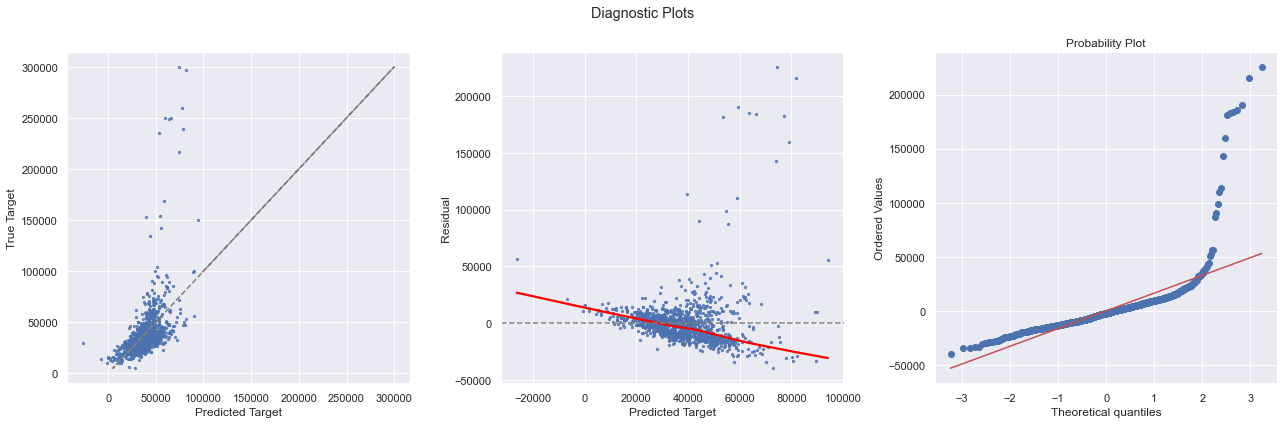

In [128]:
diagnostic_plots(fit.fittedvalues, y1, fit.resid)

In [129]:
resid = {'Name': cars_df['Name'],'Mileage':cars_df['Mileage'],'Year':cars_df['Year'],'y_pred':fit.fittedvalues,'y_actual':y1, 'residual': fit.resid}
resid_df=pd.DataFrame(resid)
#Highest Residuals
resid_df.sort_values('residual',ascending=False)[0:20]

,Name,Mileage,Year,y_pred,y_actual,residual
902,2021 Porsche 911 Turbo S,806.0,2021,74283.310675,299999.0,225715.689325
848,2022 Porsche 911 Turbo S,1153.0,2022,81592.913789,297200.0,215607.086211
1148,2020 Lamborghini Urus Base,44173.0,2020,59220.754261,249948.0,190727.245739
104,2020 Lamborghini Urus Base,22293.0,2020,63618.599248,249000.0,185381.400752
183,2020 Lamborghini Urus Base,9230.0,2020,66244.241345,249995.0,183750.758655
1320,2021 Mercedes-Benz AMG G 63 Base,1508.0,2021,77224.078873,259995.0,182770.921127
669,2017 Lamborghini Huracan LP580-2S,24562.0,2017,53443.274436,234799.0,181355.725564
165,2021 Mercedes-Benz AMG G 63 Base,6419.0,2021,79019.193232,238900.0,159880.806768
885,2021 Mercedes-Benz AMG G 63 Base,3037.0,2021,74028.460078,216955.0,142926.539922
69,2015 Porsche 911 Turbo S,20970.0,2015,39499.363626,152900.0,113400.636374


In [130]:
#Obervations: There are negative price predictions and residuals are not randomly distributed 

In [131]:
#Tackling Negative Prices: Let's check high residuals 

In [132]:
cars_df.Make.value_counts()

Honda            150
BMW              145
Mercedes-Benz    136
Toyota            72
Audi              62
Nissan            60
Acura             60
Lexus             56
Jeep              54
Chevrolet         52
Dodge             39
Volvo             30
INFINITI          25
Land Rover        22
Hyundai           21
Ford              18
Subaru            17
Mazda             17
Volkswagen        16
Kia               16
Porsche           13
Cadillac          13
GMC                9
Lincoln            7
Tesla              7
Buick              6
Alfa Romeo         4
Lamborghini        4
RAM                4
Genesis            2
Chrysler           1
MINI               1
Maserati           1
Name: Make, dtype: int64

In [133]:
#We can see that negative values are coming from Tesla,Porsche,Mercedes Benz Models, which is a luxury brand --> we have to layer in make

# Layering in Make 

In [134]:
#Approach one: get all dummies

In [135]:
cars_df.columns

Index(['Name', 'Mileage', 'Price', 'Used_Certified', 'Exterior_Color',
       'Interior_Color', 'Drivetrain', 'MPG', 'Fuel_Type', 'Engine', 'VIN',
       'Convenience', 'Entertainment', 'Safety', 'Deal_Type', 'Accidents',
       'Zip_Code', 'Average_MPG', 'Safety_Count', 'Entertainment_Count',
       'Year', 'Make', 'Model', 'Valvetrain_Type', 'Engine_Displacement',
       'Cylinders', 'Year_Squared'],
      dtype='object')

In [136]:
df_num.columns

Index(['Mileage', 'Price', 'Average_MPG', 'Safety_Count',
       'Entertainment_Count', 'Year', 'Engine_Displacement', 'Year_Squared'],
      dtype='object')

In [137]:
cars_df_2=cars_df.copy()

In [138]:
cars_df_2=pd.get_dummies(cars_df_2, columns=['Make'], drop_first=True)

In [139]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64','uint8']
df_num_2= cars_df_2.select_dtypes(include=numerics)

In [140]:
X2=df_num_2.drop(columns='Price')
y2=df_num_2['Price']

In [141]:
X2.columns

Index(['Mileage', 'Average_MPG', 'Safety_Count', 'Entertainment_Count', 'Year',
       'Engine_Displacement', 'Year_Squared', 'Make_Alfa Romeo', 'Make_Audi',
       'Make_BMW', 'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Chrysler', 'Make_Dodge', 'Make_Ford', 'Make_GMC', 'Make_Genesis',
       'Make_Honda', 'Make_Hyundai', 'Make_INFINITI', 'Make_Jeep', 'Make_Kia',
       'Make_Lamborghini', 'Make_Land Rover', 'Make_Lexus', 'Make_Lincoln',
       'Make_MINI', 'Make_Maserati', 'Make_Mazda', 'Make_Mercedes-Benz',
       'Make_Nissan', 'Make_Porsche', 'Make_RAM', 'Make_Subaru', 'Make_Tesla',
       'Make_Toyota', 'Make_Volkswagen', 'Make_Volvo'],
      dtype='object')

In [142]:
model = sm.OLS(y2, sm.add_constant(X2)) 
#Fit
fit = model.fit()
#Print out summary

/Users/riwasabri/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


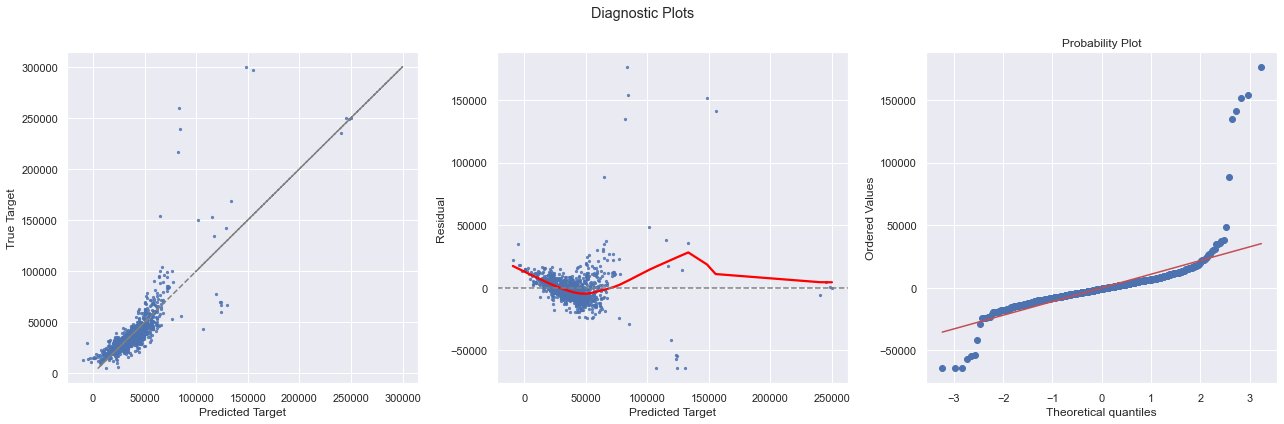

In [143]:
diagnostic_plots(fit.fittedvalues, y2, fit.resid)

In [144]:
resid2 = {'Name': cars_df_2['Name'],'Mileage':cars_df_2['Mileage'],'Year':cars_df_2['Year'],'Predicted Price':fit.fittedvalues,'Actual Price':y2, 'Residual': fit.resid}
resid_df_2=pd.DataFrame(resid2)
#Highest Residuals
resid_df_2.sort_values('Residual')[0:20]

,Name,Mileage,Year,Predicted Price,Actual Price,Residual
1758,2019 Porsche Cayenne Base,26461.0,2019,124063.347306,59900.0,-64163.347306
1221,2015 Porsche Panamera 4,53604.0,2015,106962.221981,42888.0,-64074.221981
95,2021 Porsche Macan Base,10546.0,2021,130354.001132,66420.0,-63934.001132
112,2019 Porsche Cayenne Base,22589.0,2019,123707.994107,66988.0,-56719.994107
1617,2019 Porsche Cayenne Base,20132.0,2019,124059.504604,69988.0,-54071.504604
375,2019 Porsche Cayenne Base,24974.0,2019,123366.784285,69488.0,-53878.784285
172,2019 Porsche Cayenne S,36859.0,2019,118947.251453,77690.0,-41257.251453
646,2020 Tesla Model 3 Long Range,13782.0,2020,84953.053190,56400.0,-28553.053190
710,2014 Mercedes-Benz E-Class E 550 4MATIC,58115.0,2014,50746.055029,26495.0,-24251.055029
1250,2020 Nissan Armada SL,70693.0,2020,55139.302635,30995.0,-24144.302635


In [145]:
cross_val_and_regression_results(X2,y2)

{'Cross Val Score': array([0.67229536, 0.77469201, 0.39334908, 0.69869571, 0.76676939]),
 'Linear Reg Mean Val Score ': 0.6611603076125674,
 'Linear Reg Train Score': 0.6961230164929506,
 'Linear Reg Test Score': 0.6614624280983656,
 'Mean Squared Error Test': 7029.440708525348}

In [146]:
#Approach two : less dummies

In [147]:
make_counts=cars_df.Make.value_counts().reset_index()

In [148]:
make_counts

,index,Make
0,Honda,150
1,BMW,145
2,Mercedes-Benz,136
3,Toyota,72
4,Audi,62
5,Nissan,60
6,Acura,60
7,Lexus,56
8,Jeep,54
9,Chevrolet,52


In [149]:
cars_df.groupby('Make').Price.median().sort_values()

Make
Nissan            22844.5
Buick             23449.5
Kia               24290.5
Volkswagen        25140.5
Hyundai           25577.0
Maserati          25900.0
Chevrolet         26495.0
Mazda             27395.0
Toyota            27947.5
Subaru            28500.0
Honda             29500.0
INFINITI          30999.0
GMC               31137.0
Jeep              31697.5
Ford              32245.0
Dodge             33900.0
MINI              34995.0
Genesis           35845.0
Lincoln           35990.0
Acura             36847.5
Chrysler          36994.0
Cadillac          36995.0
Lexus             37411.0
Alfa Romeo        37442.5
Audi              38990.0
BMW               39900.0
Volvo             42500.0
RAM               43473.5
Mercedes-Benz     44737.5
Land Rover        48445.0
Tesla             69748.0
Porsche           77690.0
Lamborghini      249474.0
Name: Price, dtype: float64

In [150]:
rating = []
luxury=['Lamborghini','Porsche','Tesla']
highline=['Mercedes-Benz','BMW','Audi','Cadillac','Jaguar','Land Rover']
premium=['Alfa Romeo','Volvo','Honda','Lexus']
value=['Nissan','Mazda','Toyota','Acura']
budget=['Chevrolet']



for row in make_counts['index']:
    if row in luxury :    rating.append('luxury')
    elif row in highline:   rating.append('highline')
    elif row in premium: rating.append('premium')
    elif row in value: rating.append('value')
    elif row in budget: rating.append('budget')
    else: rating.append('other')
        
make_counts['tier']=rating

In [151]:
#make_counts

In [152]:
#cars_df['Type']=cars_df.Make.map(lambda x:make_counts.loc[make_counts['index'] == x, 'tier'].iloc[0])

In [153]:
cars_df_3=pd.get_dummies(cars_df, columns=['Make'], drop_first=True)

In [154]:
#numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64','uint8']
#df_num_3= cars_df_3.select_dtypes(include=numerics)

In [155]:
#X3=df_num_3.drop(columns='Price')
#y3=df_num_3['Price']

In [156]:
#model = sm.OLS(y3, sm.add_constant(X3)) 
#Fit
#fit2 = model.fit()
#Print out summary

In [157]:
#diagnostic_plots(fit2.fittedvalues, y3, fit2.resid)

In [158]:
#resid3 = {'Name': cars_df_3['Name'],'Mileage':cars_df_3['Mileage'],'Model':cars_df_3['Model'],'Year':cars_df_3['Year'],'y_pred':fit2.fittedvalues,'y_actual':y3, 'residual': fit2.resid}
#resid_df_3=pd.DataFrame(resid3)
#Highest Residuals
#resid_df_3.sort_values('residual',ascending=False)[0:20]

In [159]:
#resid_df_3.sort_values('residual')[0:20]

In [160]:
#cross_val_and_regression_results(X3,y3)

# Feature Engineering

In [161]:
#Looks like we are overvaluing luxury and highline models that have high mileage l

In [162]:
cars_df_3=cars_df_2.copy()

In [163]:
#cars_df_3.columns

In [164]:
#cars_df_3['Tesla*Mileage']=cars_df_3['Make_Tesla']*cars_df_3['Mileage']
#cars_df_3['Porsche*Mileage']=cars_df_3['Make_Porsche']*cars_df_3['Mileage']
#cars_df_3['Mercedes-Benz*Mileage']=cars_df_3['Make_Mercedes-Benz']*cars_df_3['Mileage']
#cars_df_3['Lamborghini*Mileage']=cars_df_3['Make_Lamborghini']*cars_df_3['Mileage']

In [165]:
def f(x):
    if x['Make_Lamborghini'] == 1 and x['Mileage']> 2000: return 1
    elif x['Make_Tesla'] == 1 and x['Mileage']> 2000: return 1
    elif x['Make_Mercedes-Benz'] == 1 and x['Mileage']> 1000: return 1
    elif x['Make_Porsche'] == 1 and x['Mileage']> 2000: return 1
  
  
    else: return 0

cars_df_3['High_Mileage*Luxury'] = cars_df_3.apply(f, axis=1)

In [166]:
#cars_df_3['Interaction']=cars_df_3['Type_luxury']*cars_df_3['Mileage']*cars_df_3['Year']

In [167]:
#cars_df_3['Interaction2']=cars_df_3['Type_highline']*cars_df_3['Mileage']

In [168]:
cars_df_3

,Name,Mileage,Price,Used_Certified,Exterior_Color,Interior_Color,Drivetrain,MPG,Fuel_Type,Engine,...,Make_Mercedes-Benz,Make_Nissan,Make_Porsche,Make_RAM,Make_Subaru,Make_Tesla,Make_Toyota,Make_Volkswagen,Make_Volvo,High_Mileage*Luxury
0,2020 Mercedes-Benz GLE 350 Base 4MATIC,29984.0,52573.0,Certified,Lunar Blue Metallic,Espresso Brown,All-wheel Drive,19–26,Gasoline,2.0L I4 16V GDI DOHC Turbo,...,1,0,0,0,0,0,0,0,0,1
1,2020 Acura TLX FWD,28762.0,31199.0,Used,Gray,Ebony,Front-wheel Drive,23–33,Gasoline,2.4L I4 16V GDI DOHC,...,0,0,0,0,0,0,0,0,0,0
2,2019 Mercedes-Benz GLS 450 Base 4MATIC,8270.0,60897.0,Certified,Selenite Gray Metallic,Saddle Brown,All-wheel Drive,16–22,Gasoline,3.0L V6 24V GDI DOHC Twin Turbo,...,1,0,0,0,0,0,0,0,0,1
3,2019 Mazda CX-9 Touring,16176.0,31495.0,Used,Jet Black Mica,Black,All-wheel Drive,20–26,Gasoline,2.5L I4 16V GDI DOHC Turbo,...,0,0,0,0,0,0,0,0,0,0
5,2020 Nissan Pathfinder SL,42203.0,25150.0,Used,Gray,Charcoal,Four-wheel Drive,20–27,Gasoline,3.5L V6 24V GDI DOHC,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,2019 Volvo XC60 T6 Momentum,29643.0,37387.0,Used,Ice White,Charcoal,All-wheel Drive,19–27,Gasoline,2.0L I4 16V GDI DOHC,...,0,0,0,0,0,0,0,0,1,0
1788,2018 INFINITI QX60 Base,32746.0,22900.0,Used,Majestic White,Graphite,All-wheel Drive,19–26,Gasoline,3.5L V6 24V MPFI DOHC,...,0,0,0,0,0,0,0,0,0,0
1789,2019 GMC Acadia SLT-1,11818.0,35995.0,Certified,Summit White,Jet Black,All-wheel Drive,17–25,Gasoline,3.6L V6 24V GDI DOHC,...,0,0,0,0,0,0,0,0,0,0
1790,2020 Honda Accord Sport 1.5T,25968.0,30097.0,Used,Platinum White Pearl,Black,Front-wheel Drive,29–35,Gasoline,1.5L I4 16V GDI DOHC Turbo,...,0,0,0,0,0,0,0,0,0,0


In [169]:
df_num_3_b= cars_df_3.select_dtypes(include=numerics)

In [170]:
df_num_3_b

,Mileage,Price,Average_MPG,Safety_Count,Entertainment_Count,Year,Engine_Displacement,Year_Squared,Make_Alfa Romeo,Make_Audi,...,Make_Mercedes-Benz,Make_Nissan,Make_Porsche,Make_RAM,Make_Subaru,Make_Tesla,Make_Toyota,Make_Volkswagen,Make_Volvo,High_Mileage*Luxury
0,29984.0,52573.0,22.5,3,5,2020,2.0,4080400,0,0,...,1,0,0,0,0,0,0,0,0,1
1,28762.0,31199.0,28.0,4,4,2020,2.4,4080400,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8270.0,60897.0,19.0,3,3,2019,3.0,4076361,0,0,...,1,0,0,0,0,0,0,0,0,1
3,16176.0,31495.0,23.0,6,2,2019,2.5,4076361,0,0,...,0,0,0,0,0,0,0,0,0,0
5,42203.0,25150.0,23.5,5,2,2020,3.5,4080400,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,29643.0,37387.0,23.0,3,3,2019,2.0,4076361,0,0,...,0,0,0,0,0,0,0,0,1,0
1788,32746.0,22900.0,22.5,3,2,2018,3.5,4072324,0,0,...,0,0,0,0,0,0,0,0,0,0
1789,11818.0,35995.0,21.0,2,2,2019,3.6,4076361,0,0,...,0,0,0,0,0,0,0,0,0,0
1790,25968.0,30097.0,32.0,6,3,2020,1.5,4080400,0,0,...,0,0,0,0,0,0,0,0,0,0


In [171]:
df_num_3_B= df_num_3_b.select_dtypes(include=numerics)

In [172]:
X3_b=df_num_3_B.drop(columns=['Price'])

In [173]:
X3_b

,Mileage,Average_MPG,Safety_Count,Entertainment_Count,Year,Engine_Displacement,Year_Squared,Make_Alfa Romeo,Make_Audi,Make_BMW,...,Make_Mercedes-Benz,Make_Nissan,Make_Porsche,Make_RAM,Make_Subaru,Make_Tesla,Make_Toyota,Make_Volkswagen,Make_Volvo,High_Mileage*Luxury
0,29984.0,22.5,3,5,2020,2.0,4080400,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,28762.0,28.0,4,4,2020,2.4,4080400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8270.0,19.0,3,3,2019,3.0,4076361,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,16176.0,23.0,6,2,2019,2.5,4076361,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,42203.0,23.5,5,2,2020,3.5,4080400,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,29643.0,23.0,3,3,2019,2.0,4076361,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1788,32746.0,22.5,3,2,2018,3.5,4072324,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1789,11818.0,21.0,2,2,2019,3.6,4076361,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1790,25968.0,32.0,6,3,2020,1.5,4080400,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [174]:
cross_val_and_regression_results(X3_b,y2)

{'Cross Val Score': array([0.54007053, 0.79772765, 0.44509599, 0.70153458, 0.77749015]),
 'Linear Reg Mean Val Score ': 0.6523837792560423,
 'Linear Reg Train Score': 0.7448050986012156,
 'Linear Reg Test Score': 0.847299416921272,
 'Mean Squared Error Test': 6278.88675835049}

In [175]:
#great decrease in mse

In [176]:
#Now Let's work on adding other categorical

In [177]:
#Let's try adding in Model 

In [178]:
cars_df.Model.unique()

array(['GLE', 'TLX', 'GLS', 'CX-9', 'Pathfinder', '440', 'RAV4', 'XC60',
       'M550', 'MDX', 'A4', 'X5', 'Acadia', 'M340', 'GX', 'Discovery',
       'X1', 'X3', 'Odyssey', '911', 'Durango', 'Grand', '540',
       'Defender', 'G90', 'CR-V', 'Pilot', '340', 'Macan', 'XC90', '330',
       'GLA', 'Urus', 'E-Class', 'Cayenne', 'Accord', 'M850', 'RX', 'GLB',
       'Q8', 'Civic', 'QX60', 'Passport', 'WRX', 'Tiguan', 'Range',
       '1500', 'Q50', '528', 'XT5', 'AMG', 'Q5', 'Highlander', '530',
       'X2', 'NX', 'Camry', 'Rogue', 'A6', 'Altima', 'XC40', 'ILX', 'Q7',
       '4Runner', 'Cherokee', 'RDX', 'Sentra', 'GLC', 'C-Class',
       'S-Class', 'Murano', 'Model', 'X6', 'Suburban', 'Palisade',
       'Compass', 'C-HR', 'Sorento', 'CX-5', 'Forester', 'Tahoe', 'Q3',
       'Traverse', 'CLA', 'ES', 'Crosstrek', 'X4', 'M4', 'Elantra',
       'Tucson', 'F-150', 'RS', 'MKX', 'IS', 'A-Class', 'Outback', '430',
       '740', 'Equinox', 'S60', 'G-Class', 'Corolla', 'X7', 'Sportage',
       'CLA-C

In [179]:
model_count=cars_df_3.Model.value_counts()


In [180]:
#Taking rarest and most common models 
mask=(model_count[model_count<22].index)
mask

Index(['X3', 'Traverse', 'C-Class', 'Equinox', 'Q5', 'Range', 'GLE', 'GLC',
       'RX', 'E-Class',
       ...
       '428', 'Defender', 'Ascent', 'Panamera', 'MKX', 'EcoSport', 'Corvette',
       'SQ5', 'Ridgeline', 'Golf'],
      dtype='object', length=169)

In [181]:
other_bs=list(mask)

In [182]:
other_bs

['X3',
 'Traverse',
 'C-Class',
 'Equinox',
 'Q5',
 'Range',
 'GLE',
 'GLC',
 'RX',
 'E-Class',
 'Q7',
 'XC90',
 'Camry',
 'TLX',
 '530',
 'RDX',
 'QX60',
 '330',
 'CX-5',
 'XC60',
 'NX',
 'Altima',
 'X7',
 'Corolla',
 'Odyssey',
 'S-Class',
 'Cherokee',
 '430',
 'ES',
 'Tiguan',
 'Q50',
 'Sentra',
 'GLS',
 'Highlander',
 'Tucson',
 'GX',
 'Model',
 'GLB',
 'Forester',
 'GLA',
 'IS',
 'Elantra',
 '911',
 'Tahoe',
 'Acadia',
 'Sportage',
 'Explorer',
 'X6',
 'Q3',
 'Wrangler',
 'Trax',
 'A5',
 'X4',
 'M4',
 'F-150',
 'X1',
 'A4',
 'X2',
 'XT5',
 'Pathfinder',
 'Cayenne',
 'Passport',
 'Discovery',
 'Challenger',
 'M550',
 'Crosstrek',
 'Encore',
 'CLA',
 'HR-V',
 'Santa',
 '1500',
 'Charger',
 'Compass',
 'Escape',
 'WRX',
 '540',
 'Escalade',
 '750',
 'Armada',
 'ILX',
 'MKC',
 'Maxima',
 '440',
 'Terrain',
 'S4',
 'M850',
 'Q8',
 'A-Class',
 'Tacoma',
 'A6',
 'Optima',
 'Jetta',
 'C-HR',
 'Urus',
 'Sorento',
 '528',
 'Sienna',
 'Navigator',
 'Telluride',
 'Enclave',
 'XT4',
 'Passat',

In [183]:
cars_df_3['Model']=cars_df_3['Model'].replace(other_bs,'other')

In [184]:
cars_df.columns

Index(['Name', 'Mileage', 'Price', 'Used_Certified', 'Exterior_Color',
       'Interior_Color', 'Drivetrain', 'MPG', 'Fuel_Type', 'Engine', 'VIN',
       'Convenience', 'Entertainment', 'Safety', 'Deal_Type', 'Accidents',
       'Zip_Code', 'Average_MPG', 'Safety_Count', 'Entertainment_Count',
       'Year', 'Make', 'Model', 'Valvetrain_Type', 'Engine_Displacement',
       'Cylinders', 'Year_Squared'],
      dtype='object')

In [185]:
#Layering in categoricals 

In [186]:
cars_df_4=pd.get_dummies(cars_df_3, columns=['Model','Cylinders','Accidents','Used_Certified','Fuel_Type','Drivetrain','Valvetrain_Type','Deal_Type'], drop_first=True)
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64','uint8']
df_num_4= cars_df_4.select_dtypes(include=numerics)
X4=df_num_4.drop(columns=['Price'])
y4=df_num_4['Price']

In [187]:
X4.columns

Index(['Mileage', 'Average_MPG', 'Safety_Count', 'Entertainment_Count', 'Year',
       'Engine_Displacement', 'Year_Squared', 'Make_Alfa Romeo', 'Make_Audi',
       'Make_BMW', 'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Chrysler', 'Make_Dodge', 'Make_Ford', 'Make_GMC', 'Make_Genesis',
       'Make_Honda', 'Make_Hyundai', 'Make_INFINITI', 'Make_Jeep', 'Make_Kia',
       'Make_Lamborghini', 'Make_Land Rover', 'Make_Lexus', 'Make_Lincoln',
       'Make_MINI', 'Make_Maserati', 'Make_Mazda', 'Make_Mercedes-Benz',
       'Make_Nissan', 'Make_Porsche', 'Make_RAM', 'Make_Subaru', 'Make_Tesla',
       'Make_Toyota', 'Make_Volkswagen', 'Make_Volvo', 'High_Mileage*Luxury',
       'Model_Accord', 'Model_CR-V', 'Model_Civic', 'Model_Durango',
       'Model_Grand', 'Model_MDX', 'Model_Pilot', 'Model_RAV4', 'Model_Rogue',
       'Model_X5', 'Model_other', 'Cylinders_4', 'Cylinders_5', 'Cylinders_6',
       'Cylinders_8', 'Cylinders_Electric', 'Cylinders_H4', 'Cylinders_H6',
       

In [188]:
model = sm.OLS(y4, sm.add_constant(X4)) 
#Fit
fit4 = model.fit()
#Print out summary

/Users/riwasabri/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


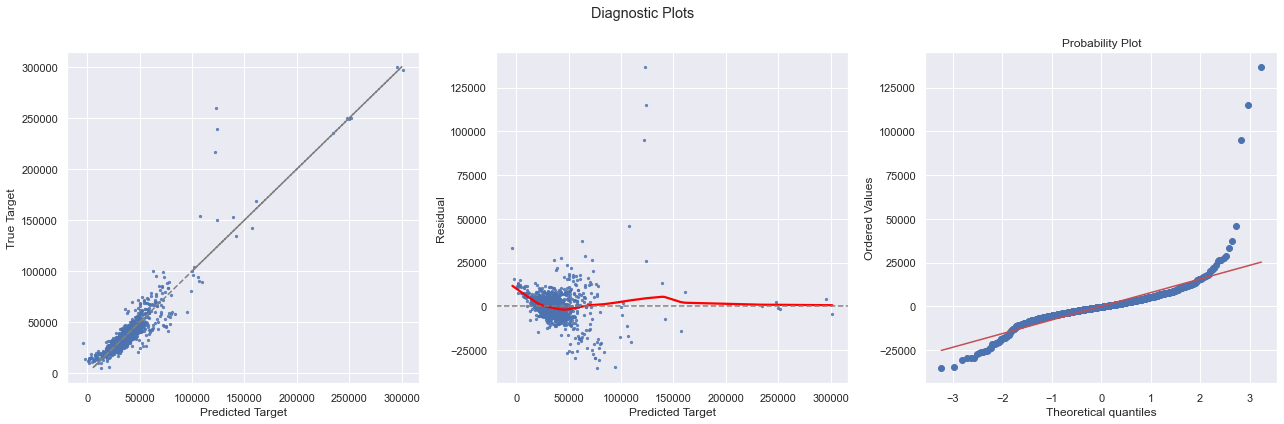

In [189]:
diagnostic_plots(fit4.fittedvalues, y4, fit4.resid)

In [190]:
cross_val_and_regression_results(X4,y4)

{'Cross Val Score': array([0.70317537, 0.77531366, 0.65034574, 0.81615866, 0.83301137]),
 'Linear Reg Mean Val Score ': 0.7556009613237344,
 'Linear Reg Train Score': 0.8551567449869606,
 'Linear Reg Test Score': 0.8829243253539256,
 'Mean Squared Error Test': 5492.387599175437}

In [191]:
resid4 = {'Name': cars_df_4['Name'],'Mileage':cars_df_4['Mileage'],'Year':cars_df_4['Year'],'y_pred':fit4.fittedvalues,'y_actual':y4, 'residual': fit4.resid}
resid_df_4=pd.DataFrame(resid4)
#Highest Residuals
resid_df_4.sort_values('residual')[0:20]

,Name,Mileage,Year,y_pred,y_actual,residual
860,2019 Mercedes-Benz AMG C 43 Base 4MATIC,60363.0,2019,77183.141592,41788.0,-35395.141592
242,2019 Mercedes-Benz AMG C 63 Base,49805.0,2019,94701.107735,59795.0,-34906.107735
418,2018 Mercedes-Benz AMG E 43 Base 4MATIC,54477.0,2018,79175.634635,48495.0,-30680.634635
1629,2019 Mercedes-Benz AMG C 43 Base 4MATIC,33206.0,2019,74829.243382,44993.0,-29836.243382
710,2014 Mercedes-Benz E-Class E 550 4MATIC,58115.0,2014,56091.947159,26495.0,-29596.947159
492,2019 Mercedes-Benz AMG C 43 Base 4MATIC,38500.0,2019,75361.351644,45995.0,-29366.351644
1220,2018 Mercedes-Benz AMG C 43 Base 4MATIC,72197.0,2018,73365.462532,45894.0,-27471.462532
984,2012 Mercedes-Benz S-Class S 550 4MATIC,89821.0,2012,48041.256121,21277.0,-26764.256121
809,2014 Mercedes-Benz GL-Class GL 450 4MATIC,69033.0,2014,52840.529863,26495.0,-26345.529863
1531,2019 Land Rover Range Rover Sport HSE,36984.0,2019,83862.921542,57800.0,-26062.921542


In [192]:
#Still doing poorly with cars rgar have extreme prices, let's plot prices and remove anything above 250,000

<AxesSubplot:xlabel='Price', ylabel='Count'>

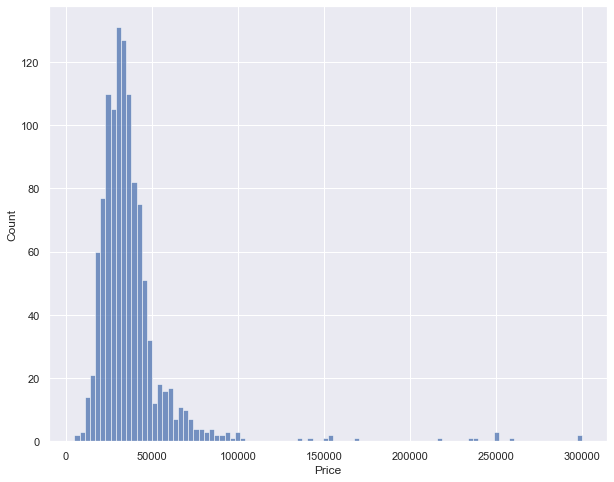

In [193]:
sns.histplot(cars_df_4.Price)

In [194]:
#Let's remove anything above 100000

In [195]:

cars_df_5=cars_df_4[cars_df_4['Price']<255000]

<AxesSubplot:xlabel='Price', ylabel='Count'>

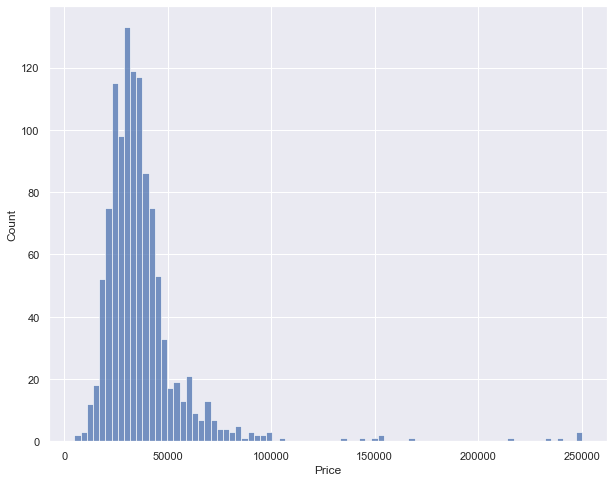

In [196]:
sns.histplot(cars_df_5.Price)

In [197]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64','uint8']
df_num_5= cars_df_5.select_dtypes(include=numerics)
X5=df_num_5.drop(columns=['Price'])
y5=df_num_5['Price']

In [198]:
cars_df_5.columns

Index(['Name', 'Mileage', 'Price', 'Exterior_Color', 'Interior_Color', 'MPG',
       'Engine', 'VIN', 'Convenience', 'Entertainment', 'Safety', 'Zip_Code',
       'Average_MPG', 'Safety_Count', 'Entertainment_Count', 'Year',
       'Engine_Displacement', 'Year_Squared', 'Make_Alfa Romeo', 'Make_Audi',
       'Make_BMW', 'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Chrysler', 'Make_Dodge', 'Make_Ford', 'Make_GMC', 'Make_Genesis',
       'Make_Honda', 'Make_Hyundai', 'Make_INFINITI', 'Make_Jeep', 'Make_Kia',
       'Make_Lamborghini', 'Make_Land Rover', 'Make_Lexus', 'Make_Lincoln',
       'Make_MINI', 'Make_Maserati', 'Make_Mazda', 'Make_Mercedes-Benz',
       'Make_Nissan', 'Make_Porsche', 'Make_RAM', 'Make_Subaru', 'Make_Tesla',
       'Make_Toyota', 'Make_Volkswagen', 'Make_Volvo', 'High_Mileage*Luxury',
       'Model_Accord', 'Model_CR-V', 'Model_Civic', 'Model_Durango',
       'Model_Grand', 'Model_MDX', 'Model_Pilot', 'Model_RAV4', 'Model_Rogue',
       'Model_X5'

In [199]:
model = sm.OLS(y5, sm.add_constant(X5)) 
#Fit
fit5 = model.fit()
#Print out summary

/Users/riwasabri/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [200]:
cross_val_and_regression_results(X5,y5)

{'Cross Val Score': array([0.85939499, 0.75101175, 0.68486623, 0.89130967, 0.8238042 ]),
 'Linear Reg Mean Val Score ': 0.802077366889919,
 'Linear Reg Train Score': 0.8558284416407135,
 'Linear Reg Test Score': 0.8053941923000844,
 'Mean Squared Error Test': 5030.896436033541}

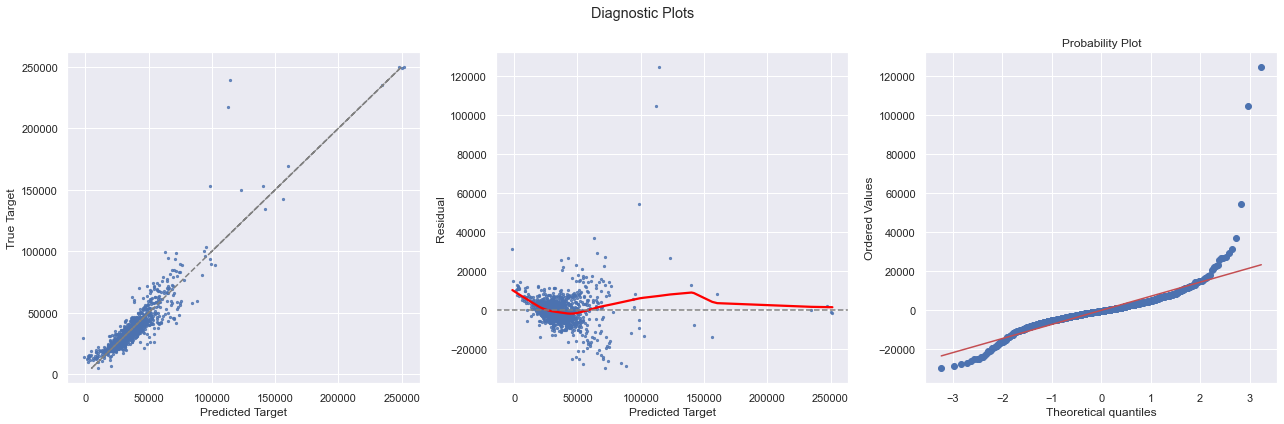

In [201]:
diagnostic_plots(fit5.fittedvalues, y5, fit5.resid)

In [202]:
resid5 = {'Name': cars_df_5['Name'],'Mileage':cars_df_5\
          ['Mileage'],'Year':cars_df_5['Year'],'Predicted':fit5.fittedvalues,'Actual':y5, 'Residual': fit5.resid}
resid5_df=pd.DataFrame(resid5)
#Highest Residuals
resid5_df.sort_values('Residual',ascending=False)[0:20]

,Name,Mileage,Year,Predicted,Actual,Residual
165,2021 Mercedes-Benz AMG G 63 Base,6419.0,2021,114076.551988,238900.0,124823.448012
885,2021 Mercedes-Benz AMG G 63 Base,3037.0,2021,112451.263758,216955.0,104503.736242
1091,2019 Mercedes-Benz AMG S 63 Base 4MATIC,21384.0,2019,98778.798880,153490.0,54711.201120
1256,2021 Chevrolet Corvette Stingray w/2LT,2235.0,2021,62747.415106,99688.0,36940.584894
818,2019 Honda Odyssey EX-L,373333.0,2019,-1409.157113,29815.0,31224.157113
430,2015 Mercedes-Benz G-Class G 63 AMG,29419.0,2015,65387.825423,94900.0,29512.174577
1792,2021 Dodge Durango SRT Hellcat,7659.0,2021,71497.570119,98900.0,27402.429881
1715,2019 Ford F-150 Raptor,14066.0,2019,42833.552097,69900.0,27066.447903
365,2022 Audi RS 6 Avant 4.0T,1555.0,2022,123211.195773,149995.0,26783.804227
360,2019 Ford F-150 Raptor,37551.0,2019,36692.123001,62450.0,25757.876999


# Interpreting Coefficients

## X4 (Keeping extreme outliers)

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X4, y4, 
                                           test_size=.2,     
                                          random_state=40)
kf = KFold(n_splits=5, 
            shuffle=True, 
            random_state = 42)
lm = LinearRegression()

scores = cross_val_score(lm, X_train, y_train, cv=kf)
   # return(("Cross Val Scores:",list(scores))
lm.fit(X_train,y_train)
           #("Linear Reg Mean Score:", np.mean(scores)))
    #y_pred=lm.predict(X_train)
mae = sum(abs(lm.predict(X_test) - y_test))/len(y_test)
print({"Cross Val Score":scores,"Linear Reg Mean Val Score ": np.mean(scores),\
           "Linear Reg Train Score":lm.score(X_train,y_train),"Linear Reg Test Score":lm.score(X_test,y_test),\
          'Mean Squared Error Test':mae })

{'Cross Val Score': array([0.67539244, 0.77069457, 0.751625  , 0.45906041, 0.71995899]), 'Linear Reg Mean Val Score ': 0.6753462846989533, 'Linear Reg Train Score': 0.847554548062995, 'Linear Reg Test Score': 0.8923416367957491, 'Mean Squared Error Test': 5796.8589379965215}


In [204]:
coeff_df=pd.DataFrame({'coef':lm.coef_,\
                       'features':X4.columns,'abs_val_coef':np.abs(lm.coef_),'exp_coef':np.exp(lm.coef_)}).sort_values(by='abs_val_coef')

/var/folders/vf/gt_dvr9s3kdby4xdz6klhvq40000gn/T/ipykernel_14676/1689683104.py:2: RuntimeWarning: overflow encountered in exp
  'features':X4.columns,'abs_val_coef':np.abs(lm.coef_),'exp_coef':np.exp(lm.coef_)}).sort_values(by='abs_val_coef')


In [205]:
coeff_df[coeff_df['features']=='Year_Squared']

,coef,features,abs_val_coef,exp_coef
6,285.923083,Year_Squared,285.923083,1.495606e+124


[Text(0.5, 0, 'Coefficients'),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, 'Features Relationship with Price')]

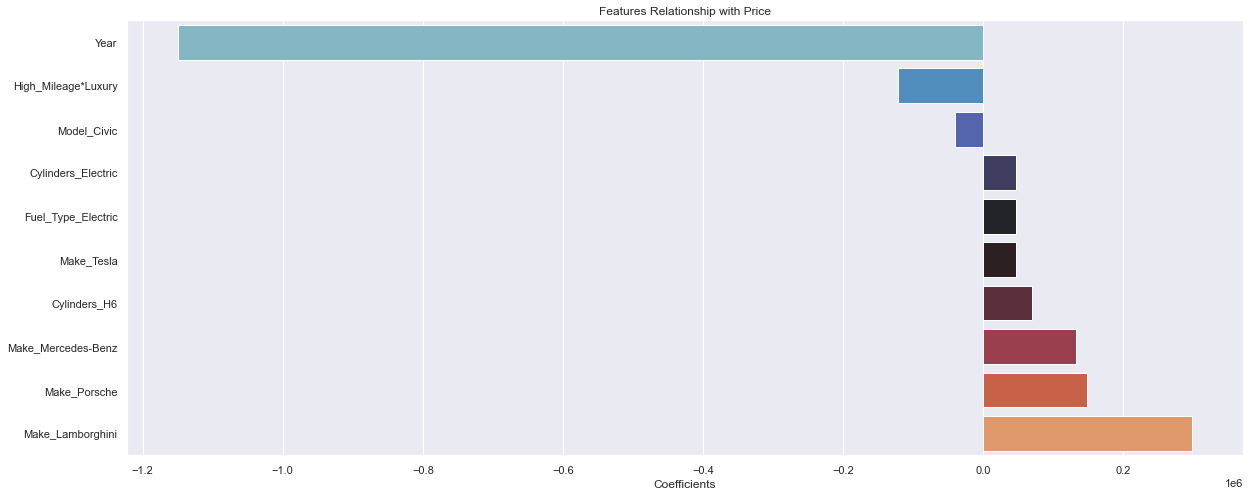

In [206]:
coeff_df=coeff_df.tail(10).sort_values('coef')
plt.figure(1,figsize=(20,8))
fig = sns.barplot(x=coeff_df['coef'], y=coeff_df['features'], palette="icefire")
fig.set(xlabel='Coefficients',ylabel='',title = 'Features Relationship with Price')

## X4 with a log transform on target

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X4, np.log(y4), 
                                           test_size=.2,     
                                          random_state=40)
kf = KFold(n_splits=5, 
            shuffle=True, 
            random_state = 42)
lm = LinearRegression()

scores = cross_val_score(lm, X_train, y_train, cv=kf)
   # return(("Cross Val Scores:",list(scores))
lm.fit(X_train,y_train)
           #("Linear Reg Mean Score:", np.mean(scores)))
    #y_pred=lm.predict(X_train)
mae = sum(abs(lm.predict(X_test) - y_test))/len(y_test)
print({"Cross Val Score":scores,"Linear Reg Mean Val Score ": np.mean(scores),\
           "Linear Reg Train Score":lm.score(X_train,y_train),"Linear Reg Test Score":lm.score(X_test,y_test),\
          'Mean Squared Error Test':mae })

{'Cross Val Score': array([0.85612515, 0.84897797, 0.85934462, 0.83757971, 0.87587574]), 'Linear Reg Mean Val Score ': 0.8555806398764314, 'Linear Reg Train Score': 0.8968669105677217, 'Linear Reg Test Score': 0.8993814092633257, 'Mean Squared Error Test': 0.10530544016157825}


In [208]:
coeff_df=pd.DataFrame({'coef':lm.coef_,\
                       'features':X4.columns,'abs_val_coef':np.abs(lm.coef_),'exp_coef':np.exp(lm.coef_)}).sort_values(by='abs_val_coef')
coeff_df

,coef,features,abs_val_coef,exp_coef
27,3.497203e-15,Make_MINI,3.497203e-15,1.000000
0,-3.032597e-06,Mileage,3.032597e-06,0.999997
6,-6.630092e-05,Year_Squared,6.630092e-05,0.999934
25,2.941933e-03,Make_Lexus,2.941933e-03,1.002946
1,-3.316965e-03,Average_MPG,3.316965e-03,0.996689
...,...,...,...,...
42,-4.470601e-01,Model_Civic,4.470601e-01,0.639505
32,5.937204e-01,Make_Porsche,5.937204e-01,1.810712
52,-5.964789e-01,Cylinders_5,5.964789e-01,0.550747
57,8.156592e-01,Cylinders_H6,8.156592e-01,2.260665


[Text(0.5, 0, 'Coefficients'),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, 'Features Relationship with Price')]

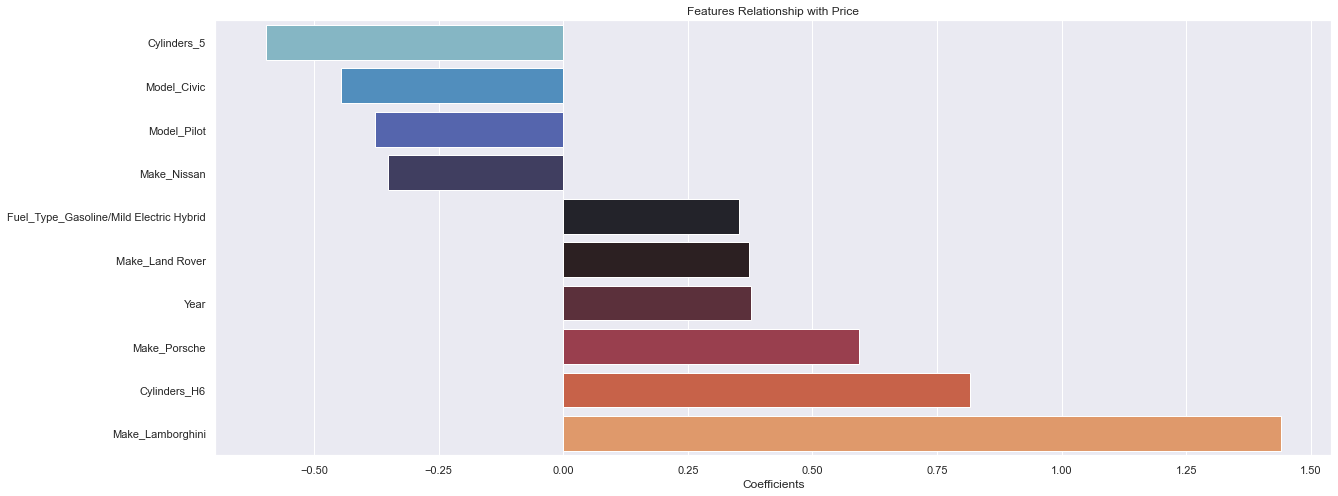

In [209]:
coeff_df=coeff_df.tail(10).sort_values('coef')
plt.figure(1,figsize=(20,8))
fig = sns.barplot(x=coeff_df['coef'], y=coeff_df['features'], palette="icefire")
fig.set(xlabel='Coefficients',ylabel='',title = 'Features Relationship with Price')

## Now trying X5 (equivalent to X4 but removing Outliers)

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X5, y5, 
                                           test_size=.2,     
                                          random_state=42)
kf = KFold(n_splits=5, 
            shuffle=True, 
            random_state = 42)
lm = LinearRegression()

scores = cross_val_score(lm, X_train, y_train, cv=kf)
   # return(("Cross Val Scores:",list(scores))
lm.fit(X_train,y_train)
           #("Linear Reg Mean Score:", np.mean(scores)))
    #y_pred=lm.predict(X_train)
mae = sum(abs(lm.predict(X_test) - y_test))/len(y_test)
print({"Cross Val Score":scores,"Linear Reg Mean Val Score ": np.mean(scores),\
           "Linear Reg Train Score":lm.score(X_train,y_train),"Linear Reg Test Score":lm.score(X_test,y_test),\
          'Mean Squared Error Test':mae })

{'Cross Val Score': array([0.85939499, 0.75101175, 0.68486623, 0.89130967, 0.8238042 ]), 'Linear Reg Mean Val Score ': 0.802077366889919, 'Linear Reg Train Score': 0.8558284416407135, 'Linear Reg Test Score': 0.8053941923000844, 'Mean Squared Error Test': 5030.896436033541}


In [211]:
coeff_df=pd.DataFrame({'coef':lm.coef_,\
                       'features':X5.columns,'abs_val_coef':np.abs(lm.coef_),'exp_coef':np.exp(lm.coef_)}).sort_values(by='abs_val_coef')

/var/folders/vf/gt_dvr9s3kdby4xdz6klhvq40000gn/T/ipykernel_14676/3217698859.py:2: RuntimeWarning: overflow encountered in exp
  'features':X5.columns,'abs_val_coef':np.abs(lm.coef_),'exp_coef':np.exp(lm.coef_)}).sort_values(by='abs_val_coef')


In [212]:
coeff_df

,coef,features,abs_val_coef,exp_coef
0,-0.099029,Mileage,0.099029,9.057161e-01
29,74.631213,Make_Mazda,74.631213,2.581808e+32
37,-96.779557,Make_Volkswagen,96.779557,9.314778e-43
1,-118.731968,Average_MPG,118.731968,2.724968e-52
64,-194.974663,Used_Certified_Used,194.974663,2.106590e-85
...,...,...,...,...
67,44228.162861,Fuel_Type_Gasoline/Mild Electric Hybrid,44228.162861,inf
39,52481.649584,High_Mileage*Luxury,52481.649584,inf
57,91021.601983,Cylinders_H6,91021.601983,inf
23,126366.147121,Make_Lamborghini,126366.147121,inf


[Text(0.5, 0, 'Coefficients'),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, 'Features Relationship with Price')]

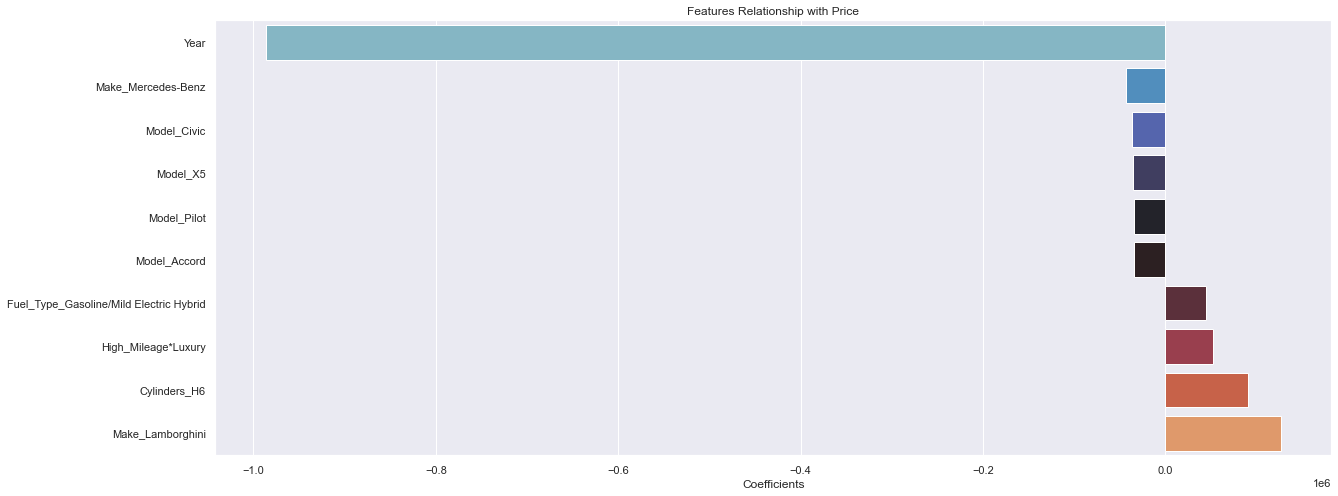

In [213]:
coeff_df=coeff_df.tail(10).sort_values('coef')
plt.figure(1,figsize=(20,8))
fig = sns.barplot(x=coeff_df['coef'], y=coeff_df['features'], palette="icefire")
fig.set(xlabel='Coefficients',ylabel='',title = 'Features Relationship with Price')

In [214]:
#Trying with log transformation

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X5, np.log(y5), 
                                           test_size=.2,     
                                          random_state=42)
kf = KFold(n_splits=5, 
            shuffle=True, 
            random_state = 42)
lm = LinearRegression()

scores = cross_val_score(lm, X_train, y_train, cv=kf)
   # return(("Cross Val Scores:",list(scores))
lm.fit(X_train,y_train)
           #("Linear Reg Mean Score:", np.mean(scores)))
    #y_pred=lm.predict(X_train)
mae = sum(abs(lm.predict(X_test) - y_test))/len(y_test)
print({"Cross Val Score":scores,"Linear Reg Mean Val Score ": np.mean(scores),\
           "Linear Reg Train Score":lm.score(X_train,y_train),"Linear Reg Test Score":lm.score(X_test,y_test),\
          'Mean Squared Error Test':mae })

{'Cross Val Score': array([0.88442019, 0.80169963, 0.8765208 , 0.88486865, 0.86121423]), 'Linear Reg Mean Val Score ': 0.86174469745093, 'Linear Reg Train Score': 0.89579260779198, 'Linear Reg Test Score': 0.8750330974118369, 'Mean Squared Error Test': 0.1003716979940347}


In [216]:
### Feature Interpretation

coeff_df=pd.DataFrame({'coef':lm.coef_,\
                       'features':X5.columns,'abs_val_coef':np.abs(lm.coef_),'exp_coef':np.exp(lm.coef_)}).sort_values(by='abs_val_coef')

In [217]:
coeff_df=coeff_df.tail(10).sort_values('coef')

In [218]:
sns.set(context='notebook', style='whitegrid', font_scale=1.)

[Text(0.5, 0, 'Coefficients'),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, 'Features Relationship with Price')]

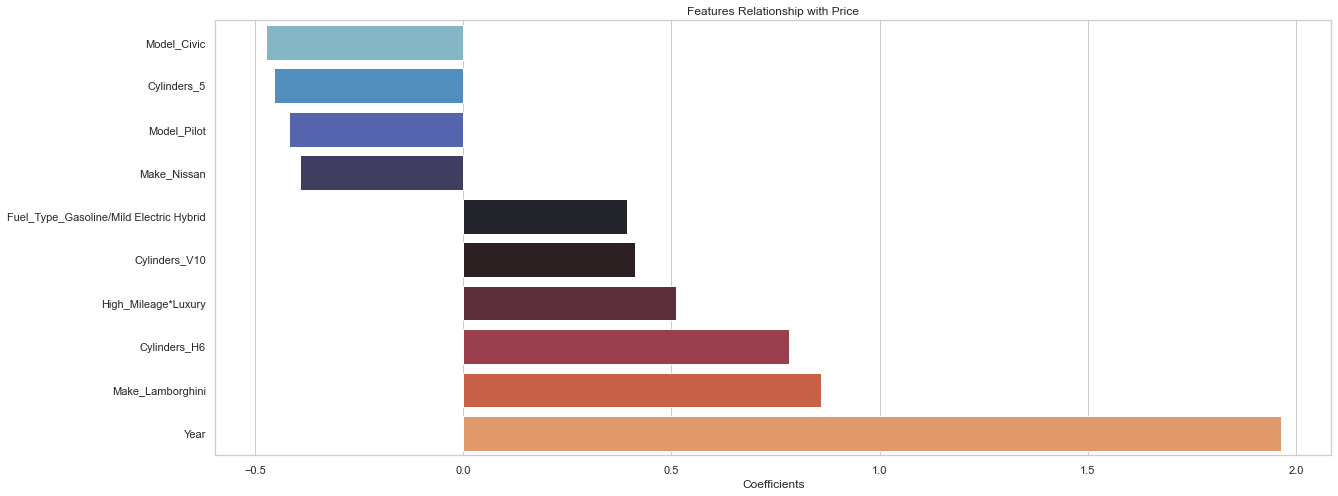

In [219]:
plt.figure(1,figsize=(20,8))
fig = sns.barplot(x=coeff_df['coef'], y=coeff_df['features'], palette="icefire")
fig.set(xlabel='Coefficients',ylabel='',title = 'Features Relationship with Price')

# Trying Lasso

## On X4

In [220]:

X_train, X_test, y_train, y_test = train_test_split(X4, y4, 
                                           test_size=.2,     
                                          random_state=42)
    
std = StandardScaler()
std.fit(X_train.values)
X_tr = std.transform(X_train.values)

X_te = std.transform(X_test.values)
kf = KFold(n_splits=5, 
            shuffle=True, 
            random_state = 42)
lasso_model = LassoCV()

scores = cross_val_score(lasso_model, X_tr, y_train, cv=kf)
   # return(("Cross Val Scores:",list(scores))
lasso_model.fit(X_tr,y_train)
           #("Linear Reg Mean Score:", np.mean(scores)))
print({"Cross Val Score":scores,"Lasso Reg Mean Val Score ": np.mean(scores),\
           "Lasso Reg Train Score":lasso_model.score(X_tr,y_train),"Lasso Reg Test Score":lasso_model.score(X_te,y_test)})

/Users/riwasabri/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55136624.75488281, tolerance: 48302791.16678918
  model = cd_fast.enet_coordinate_descent(


{'Cross Val Score': array([0.78559678, 0.77814559, 0.52892636, 0.81416415, 0.82802207]), 'Lasso Reg Mean Val Score ': 0.7469709911309327, 'Lasso Reg Train Score': 0.8477965340244885, 'Lasso Reg Test Score': 0.8841450571043387}


/Users/riwasabri/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85991343.63868713, tolerance: 61550243.24704201
  model = cd_fast.enet_coordinate_descent(


In [221]:
lasso_coef=list(zip(X_train.columns, lasso_model.coef_))
lasso_coef

[('Mileage', -2742.834457658466),
 ('Average_MPG', -1272.3758625843452),
 ('Safety_Count', -1704.0011422183886),
 ('Entertainment_Count', 1297.8234537772805),
 ('Year', 4336.839129940905),
 ('Engine_Displacement', 1060.5688033014321),
 ('Year_Squared', 2029.5297854025528),
 ('Make_Alfa Romeo', 75.7936731415574),
 ('Make_Audi', 1674.4783647507193),
 ('Make_BMW', 2035.3454578420449),
 ('Make_Buick', -638.6991331174709),
 ('Make_Cadillac', -64.44815951593485),
 ('Make_Chevrolet', -1340.622971333902),
 ('Make_Chrysler', -119.14220570417623),
 ('Make_Dodge', -2061.059497237091),
 ('Make_Ford', 336.5733206965509),
 ('Make_GMC', -553.1311908624234),
 ('Make_Genesis', -344.835680891246),
 ('Make_Honda', -886.386321702036),
 ('Make_Hyundai', -807.6489899452168),
 ('Make_INFINITI', -814.093897632103),
 ('Make_Jeep', -1161.4482227323233),
 ('Make_Kia', -483.7773840581245),
 ('Make_Lamborghini', 18540.750004695474),
 ('Make_Land Rover', 2372.1662911414105),
 ('Make_Lexus', 0.0),
 ('Make_Lincoln', 

## On log X4

In [222]:

X_train, X_test, y_train, y_test = train_test_split(X4, np.log(y4), 
                                           test_size=.2,     
                                          random_state=42)
    
std = StandardScaler()
std.fit(X_train.values)
X_tr = std.transform(X_train.values)

X_te = std.transform(X_test.values)
kf = KFold(n_splits=5, 
            shuffle=True, 
            random_state = 42)
lasso_model = Lasso(alpha=0.003)

scores = cross_val_score(lasso_model, X_tr, y_train, cv=kf)
   # return(("Cross Val Scores:",list(scores))
lasso_model.fit(X_tr,y_train)
           #("Linear Reg Mean Score:", np.mean(scores)))
print({"Cross Val Score":scores,"Lasso Reg Mean Val Score ": np.mean(scores),\
           "Lasso Reg Train Score":lasso_model.score(X_tr,y_train),"Lasso Reg Test Score":lasso_model.score(X_te,y_test)})

{'Cross Val Score': array([0.91698719, 0.8233877 , 0.82763242, 0.83856663, 0.8653073 ]), 'Lasso Reg Mean Val Score ': 0.8543762500405107, 'Lasso Reg Train Score': 0.8879691491512652, 'Lasso Reg Test Score': 0.8934722622484906}


In [223]:
lasso_coef=list(zip(X_train.columns, lasso_model.coef_))
a=pd.DataFrame(lasso_coef)

In [224]:
y_pred = lasso_model.predict(X_te)

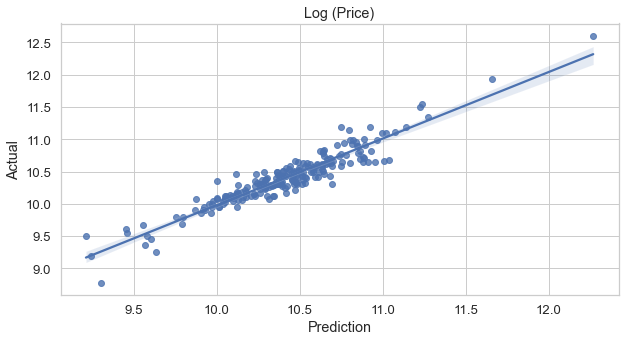

In [225]:
sns.set(context='notebook', style='whitegrid', font_scale=1.2)
plt.figure(1,figsize=(10,5))
fig = sns.regplot(x = y_pred, y = y_test)
fig.set(xlabel='Prediction',ylabel = 'Actual', title = 'Log (Price)')
plt.savefig('Actualvsprediction.png')

In [226]:
a[2]=np.abs(a[1])

In [227]:
a=a.sort_values(2,ascending=False).head(10)

In [228]:
a[3]=np.exp(a[1])

In [229]:
a[4]=a[1].apply(lambda x:plot_coef(x))

NameError: name 'plot_coef' is not defined

In [ ]:
a[4]=a[3]*a[4]

In [ ]:
a=a.sort_values(4)

In [ ]:
sns.set(context='notebook', style='whitegrid', font_scale=1.5)
plt.figure(1,figsize=(20,8))
fig = sns.barplot(x=a[4], y=a[0], palette="icefire")
fig.set(xlabel='Coefficients',ylabel='',title = 'Percentage Change in Price based on 1 Standard Deviation of Feature')

## On X5

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X5, y5, 
                                           test_size=.2,     
                                          random_state=42)
    
std = StandardScaler()
std.fit(X_train.values)
X_tr = std.transform(X_train.values)

X_te = std.transform(X_test.values)
kf = KFold(n_splits=5, 
            shuffle=True, 
            random_state = 42)
lasso_model = LassoCV()

scores = cross_val_score(lasso_model, X_tr, y_train, cv=kf)
   # return(("Cross Val Scores:",list(scores))
lasso_model.fit(X_tr,y_train)
           #("Linear Reg Mean Score:", np.mean(scores)))
print({"Cross Val Score":scores,"Lasso Reg Mean Val Score ": np.mean(scores),\
           "Lasso Reg Train Score":lasso_model.score(X_tr,y_train),"Lasso Reg Test Score":lasso_model.score(X_te,y_test)})

In [ ]:
lasso_coef=list(zip(X_train.columns, lasso_model.coef_))

In [ ]:
lasso_coef

## On log X5

## On log X5

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X5, np.log(y5), 
                                           test_size=.2,     
                                          random_state=42)
    
std = StandardScaler()
std.fit(X_train.values)
X_tr = std.transform(X_train.values)

X_te = std.transform(X_test.values)
kf = KFold(n_splits=5, 
            shuffle=True, 
            random_state = 42)
lasso_model = Lasso(alpha=0.001)

scores = cross_val_score(lasso_model, X_tr, y_train, cv=kf)
   # return(("Cross Val Scores:",list(scores))
lasso_model.fit(X_tr,y_train)
           #("Linear Reg Mean Score:", np.mean(scores)))
print({"Cross Val Score":scores,"Lasso Reg Mean Val Score ": np.mean(scores),\
           "Lasso Reg Train Score":lasso_model.score(X_tr,y_train),"Lasso Reg Test Score":lasso_model.score(X_te,y_test)})

In [ ]:
lasso_coef=list(zip(X_train.columns, lasso_model.coef_))
lasso_coef

# Trying Ridge

## On X4

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size=.2,random_state=42)
    
std = StandardScaler()
std.fit(X_train.values)
X_tr = std.transform(X_train.values)

X_te = std.transform(X_test.values)
kf = KFold(n_splits=5, 
            shuffle=True, 
            random_state = 42)
lr_model_ridge = RidgeCV()

scores = cross_val_score(lr_model_ridge, X_tr, y_train, cv=kf)
   # return(("Cross Val Scores:",list(scores))
lr_model_ridge.fit(X_tr, y_train)
           #("Linear Reg Mean Score:", np.mean(scores)))
print({"Cross Val Score":scores,"Ridge Reg Mean Val Score ": np.mean(scores),\
           "Ridge Reg Train Score":lr_model_ridge.score(X_tr,y_train),\
          "Ridge Reg Test Score":lr_model_ridge.score(X_te,y_test)})

In [ ]:
list(zip(X_train.columns, lr_model_ridge.coef_))

## On Log X4

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X4, np.log(y4), test_size=.2,random_state=42)
    
std = StandardScaler()
std.fit(X_train.values)
X_tr = std.transform(X_train.values)

X_te = std.transform(X_test.values)
kf = KFold(n_splits=5, 
            shuffle=True, 
            random_state = 42)
lr_model_ridge = RidgeCV()

scores = cross_val_score(lr_model_ridge, X_tr, y_train, cv=kf)
   # return(("Cross Val Scores:",list(scores))
lr_model_ridge.fit(X_tr, y_train)
           #("Linear Reg Mean Score:", np.mean(scores)))
print({"Cross Val Score":scores,"Ridge Reg Mean Val Score ": np.mean(scores),\
           "Ridge Reg Train Score":lr_model_ridge.score(X_tr,y_train),\
          "Ridge Reg Test Score":lr_model_ridge.score(X_te,y_test)})

In [ ]:
list(zip(X_train.columns, lr_model_ridge.coef_))

## On X5

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X5, y5, test_size=.2,random_state=42)
    
std = StandardScaler()
std.fit(X_train.values)
X_tr = std.transform(X_train.values)

X_te = std.transform(X_test.values)
kf = KFold(n_splits=5, 
            shuffle=True, 
            random_state = 42)
lr_model_ridge = Ridge(alpha=.02)

scores = cross_val_score(lr_model_ridge, X_tr, y_train, cv=kf)
   # return(("Cross Val Scores:",list(scores))
lr_model_ridge.fit(X_tr, y_train)
           #("Linear Reg Mean Score:", np.mean(scores)))
print({"Cross Val Score":scores,"Ridge Reg Mean Val Score ": np.mean(scores),\
           "Ridge Reg Train Score":lr_model_ridge.score(X_tr,y_train),\
          "Ridge Reg Test Score":lr_model_ridge.score(X_te,y_test)})

In [ ]:
X5.columns

In [ ]:
list(zip(X_train.columns, lr_model_ridge.coef_))

## On log X5

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X5, np.log(y5), test_size=.2,random_state=42)
    
std = StandardScaler()
std.fit(X_train.values)
X_tr = std.transform(X_train.values)

X_te = std.transform(X_test.values)
kf = KFold(n_splits=5, 
            shuffle=True, 
            random_state = 42)
lr_model_ridge = RidgeCV()

scores = cross_val_score(lr_model_ridge, X_tr, y_train, cv=kf)
   # return(("Cross Val Scores:",list(scores))
lr_model_ridge.fit(X_tr, y_train)
           #("Linear Reg Mean Score:", np.mean(scores)))
print({"Cross Val Score":scores,"Ridge Reg Mean Val Score ": np.mean(scores),\
           "Ridge Reg Train Score":lr_model_ridge.score(X_tr,y_train),\
          "Ridge Reg Test Score":lr_model_ridge.score(X_te,y_test)})

In [ ]:
list(zip(X_train.columns, lr_model_ridge.coef_))

# Plotting Interactions

## Luxury x Mileage

In [ ]:
mask=((cars_df['Make']=='Porsche')|(cars_df['Make']=='Lamborghini')|(cars_df['Make']=='Tesla')|(cars_df['Make']=='Mercedes-Benz'))&(cars_df['Mileage']<125000)

In [ ]:
cars_df_luxury_plot=cars_df[mask]

In [ ]:
sns.set(context='notebook', style='whitegrid', font_scale=1.)
sns.lmplot(x='Mileage',y='Price',data=cars_df_luxury_plot,hue='Make')

In [ ]:
#sns.set(context='notebook', style='whitegrid', font_scale=1.)
#sns.lmplot(x='Mileage',y='points',data=cars_df_3,hue='Make_Porsche')

## Accidents x Year

In [ ]:
sns.lmplot(x='Year',y='Price',data=cars_df,hue='Deal_Type')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X4, np.log(y4), 
                                           test_size=.2,     
                                          random_state=40)
kf = KFold(n_splits=5, 
            shuffle=True, 
            random_state = 42)
lm = LinearRegression()

scores = cross_val_score(lm, X_train, y_train, cv=kf)
   # return(("Cross Val Scores:",list(scores))
lm.fit(X_train,y_train)
           #("Linear Reg Mean Score:", np.mean(scores)))
    #y_pred=lm.predict(X_train)
mae = sum(abs(lm.predict(X_test) - y_test))/len(y_test)
print({"Cross Val Score":scores,"Linear Reg Mean Val Score ": np.mean(scores),\
           "Linear Reg Train Score":lm.score(X_train,y_train),"Linear Reg Test Score":lm.score(X_test,y_test),\
          'Mean Squared Error Test':mae })

In [ ]:
#https://en.wikipedia.org/wiki/Semi-log_plot
def build_grid_search_est(model, X, y, cv=5, **params):

    grid_est = GridSearchCV(model, param_grid=params, cv=kf, 
                            return_train_score=False)
    grid_est.fit(X, y)
    df = pd.DataFrame(grid_est.cv_results_)
    for param in params:
        df[param] = df.params.apply(lambda val: val[param])
#     plt.plot(np.log(df.alpha), df.mean_test_score);
        plt.semilogx(df.alpha, df.mean_test_score)
    return grid_est

In [ ]:
lasso_grid_est = build_grid_search_est(Lasso(), X_train, y_train, cv=kf,
                                       alpha=(0.0003,0.0003))

In [ ]:
lasso_grid_est

In [ ]:
lasso_grid_est.best_estimator_

In [ ]:
y_pred = lasso_grid_est.predict(X_test)
print("Lasso Regression:", r2_score(y_test, y_pred))

In [ ]:
final_coefficients=pd.DataFrame(list(zip(X_train.columns, lasso_grid_est.best_estimator_.coef_,\
                                        np.abs(lasso_grid_est.best_estimator_.coef_),\
                                         np.exp(lasso_grid_est.best_estimator_.coef_)
                                        )))

In [ ]:
#'abs_val_coef':np.abs(lm.coef_),'exp_coef':np.exp(lm.coef_)})

In [ ]:
final_coefficients

In [ ]:
final_coefficients=final_coefficients.sort_values(2,ascending=False).head(10)

In [ ]:
final_coefficients

In [ ]:
def plot_coef(coef):
    if coef<0:
        return -1
    else:
        return 1
final_coefficients[4]=final_coefficients[1].apply(lambda x:plot_coef(x))

In [ ]:
final_coefficients[4]=final_coefficients[4]*final_coefficients[3]

In [ ]:
final_coefficients=final_coefficients.sort_values(4)

In [ ]:
plt.figure(1,figsize=(20,8))
fig = sns.barplot(x=final_coefficients[4], y=final_coefficients[0], palette="icefire")
fig.set(xlabel='Coefficients',ylabel='',title = 'Features Relationship with Price')

In [ ]:
sns.set(context='notebook', style='whitegrid', font_scale=1.2)
plt.figure(1,figsize=(10,5))
fig = sns.regplot(x = y_pred, y = y_test)
fig.set(xlabel='Prediction',ylabel = 'Actual', title = 'Log (Price)')
plt.savefig('Actualvsprediction.png')